In [1]:
#import libraries
from __future__ import division
from datetime import datetime, timedelta,date
import datetime as dt 
import pandas as pd
from pandas import DataFrame
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:

#import plotly for visualization
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#initiate plotly
pyoff.init_notebook_mode()

In [4]:
#define missing values types
missing_values=['','na','N/A','NA','NaN']
#import the csv
tx_data = pd.read_csv('data_final.csv',encoding="ISO-8859-1",na_values=missing_values)

#print first 10 rows
tx_data.head(10)


arrived_date  arrived_time responsible_dept supplier_of_the_container  \
0     15-02-20          8.02       Industrial           LANKA FEIGHTERS   
1     15-02-20          9.20       Industrial              IWS HOLDINGS   
2     15-02-20         10.40          Medical           LANKA FEIGHTERS   
3     15-02-20         13.10       Industrial           LANKA FEIGHTERS   
4     15-02-20         12.10          Medical           LANKA FEIGHTERS   
5     15-02-20         14.09       Industrial           LANKA FEIGHTERS   
6     15-02-20          9.20       Industrial              IWS HOLDINGS   
7     15-02-20         10.40       Industrial           LANKA FEIGHTERS   
8     15-02-20         13.10       Industrial              IWS HOLDINGS   
9     15-02-20         12.10          Medical           LANKA FEIGHTERS   

  direct_container_to_warehouse_date  direct_container_to_warehouse_time  \
0                           15-02-20                                8.13   
1                           15-02-20                                9.35   
2                           15-02-20                               10.45   
3                           15-02-20                               13.20   
4                           15-02-20                               12.20   
5                           15-02-20                               14.15   
6                           15-02-20                                9.35   
7                           15-02-20                               10.45   
8                           15-02-20                               13.20   
9                           15-02-20                               12.20   

  container_arrived_to_warehouse_date  container_arrived_to_warehouse_time  \
0                            15-02-20                                  8.2   
1                            15-02-20                                 10.0   
2                            15-02-20                                 11.0   
3                            15-02-20                                 13.3   
4                            15-02-20                                 12.3   
5                            15-02-20                                 14.2   
6                            15-02-20                                 10.0   
7                            15-02-20                                 11.0   
8                            15-02-20                                 13.3   
9                            15-02-20                                 12.3   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                  Yes                      15-02-20  ...   
1                                  Yes                      15-02-20  ...   
2                                  Yes                      15-02-20  ...   
3                                  Yes                      15-02-20  ...   
4                                  Yes                      15-02-20  ...   
5                                  Yes                      15-02-20  ...   
6                                  Yes                      15-02-20  ...   
7                                  Yes                      15-02-20  ...   
8                                  Yes                      15-02-20  ...   
9                                  Yes                      15-02-20  ...   

   documentation_process_time status_documentation_process  \
0                       12.00                           No   
1                       12.45                           No   
2                       14.00                          Yes   
3                       18.00                           No   
4                       18.00                           No   
5                       12.50                          Yes   
6                       15.40                           No   
7                       13.40                           No   
8                        6.30                           No   
9           

In [5]:
# describe data
print(tx_data.describe())

       arrived_time  direct_container_to_warehouse_time  \
count   2609.000000                         2607.000000   
mean      11.251284                           11.401880   
std        2.037534                            2.015471   
min        7.200000                            7.400000   
25%        9.450000                           10.000000   
50%       11.000000                           11.150000   
75%       13.090000                           13.200000   
max       20.450000                           20.500000   

       container_arrived_to_warehouse_time  loading_bay_in_time_warehouse  \
count                          2604.000000                    2604.000000   
mean                             11.652742                      12.072377   
std                               1.922265                       2.139680   
min                               8.200000                       6.000000   
25%                              10.100000                      10.300000   
50%   

In [6]:
#Data cleaning find missing values

print(tx_data.isnull().sum())

arrived_date                                   0
arrived_time                                   0
responsible_dept                               5
supplier_of_the_container                      0
direct_container_to_warehouse_date             0
direct_container_to_warehouse_time             2
container_arrived_to_warehouse_date            5
container_arrived_to_warehouse_time            5
status_direct_container_to_warehouse           0
loading_bay_in_date_warehouse                  5
loading_bay_in_time_warehouse                  5
status_loading_bay                             0
reason_for_warehouse_waitting                 60
finished_goods_loading_date                    5
finished_goods_loading_time                    5
finished_goods_complete_date                   5
finished_goods_complete_time                   5
status_finished_goods_loading                  0
reasons_for_finsihed_goods_loading_delay      41
documentation_process_date                     4
documentation_proces

In [7]:
# Data cleaning container number

print(tx_data['arrived_date'])
print(tx_data['arrived_date'].isnull().sum())
# tx_data['arrived_date'].fillna['TRHU3600950']

0       15-02-20
1       15-02-20
2       15-02-20
3       15-02-20
4       15-02-20
          ...   
2604    16/09/20
2605    17/09/20
2606    17/09/20
2607    17/09/20
2608    17/09/20
Name: arrived_date, Length: 2609, dtype: object
0


In [8]:
#Data cleaning Visit_State

# print(tx_data['Visit_State'])
# print(tx_data['Visit_State'].isnull().sum())
# tx_data['Visit_State']

In [9]:
# #convert date field from string to datetime
# tx_data['Create_Time'] = pd.to_datetime(tx_data['Create_Time'])
# tx_data['ATA'] = pd.to_datetime(tx_data['ATA'])
# tx_data['ATD'] = pd.to_datetime(tx_data['ATD'])

# #print first 10 rows
# tx_data.head(10)

In [10]:
# tx_class = tx_data.copy()
# tx_class = pd.get_dummies(tx_class)

In [11]:
# corr = tx_class[tx_class.columns].corr()
# plt.figure(figsize = (30,20))
# sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")
# tx_class = pd.DataFrame(tx_data,columns=['Create_Time','ATA'])
# print(tx_class.corr())

In [12]:
#convert container_arrived_to_warehouse_date field from string to datetime
#tx_data['container_arrived_to_warehouse_date'] = pd.to_datetime(tx_data['container_arrived_to_warehouse_date'])

#convert loading_bay_in_date_warehouse field from string to datetime 
#tx_data['loading_bay_in_date_warehouse'] = pd.to_datetime(tx_data['loading_bay_in_date_warehouse'])

#print first 10 rows
#tx_data.head(10)

In [13]:
#drop the null values included rows --senitha
tx_data = tx_data[tx_data['container_arrived_to_warehouse_date'].notna()]

#print rows
print(tx_data['container_arrived_to_warehouse_date'])


0       15-02-20
1       15-02-20
2       15-02-20
3       15-02-20
4       15-02-20
          ...   
2599    15/09/20
2600    15/09/20
2601    16/09/20
2605    17/09/20
2608    17/09/20
Name: container_arrived_to_warehouse_date, Length: 2604, dtype: object


In [14]:
# convert into date time in order to do the next step --senitha
tx_data['container_arrived_to_warehouse_date'] = pd.to_datetime(tx_data['container_arrived_to_warehouse_date'])

# date formatting
tx_data['container_arrived_to_warehouse_date'] = tx_data['container_arrived_to_warehouse_date'].dt.strftime('%Y.%m.%d')
tx_data['container_arrived_to_warehouse_date']

0       2020.02.15
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2599    2020.09.15
2600    2020.09.15
2601    2020.09.16
2605    2020.09.17
2608    2020.09.17
Name: container_arrived_to_warehouse_date, Length: 2604, dtype: object

In [15]:
# remove the dots from the data list --senitha
tx_data.container_arrived_to_warehouse_date = tx_data.container_arrived_to_warehouse_date.str.replace('[.]','')
tx_data.container_arrived_to_warehouse_date

0       20200215
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2599    20200915
2600    20200915
2601    20200916
2605    20200917
2608    20200917
Name: container_arrived_to_warehouse_date, Length: 2604, dtype: object

In [16]:
#drop the null values included rows --senitha
tx_data = tx_data[tx_data['container_arrived_to_warehouse_time'].notna()]

#print rows
print(tx_data['container_arrived_to_warehouse_time'])


0        8.20
1       10.00
2       11.00
3       13.30
4       12.30
        ...  
2599     9.25
2600     8.40
2601     9.00
2605    10.00
2608     9.00
Name: container_arrived_to_warehouse_time, Length: 2604, dtype: float64


In [17]:
#  get rid of decimal places --senitah
import numpy as np
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'container_arrived_to_warehouse_time'] = row['container_arrived_to_warehouse_time']*100
    
tx_data['container_arrived_to_warehouse_time']

0        820.0
1       1000.0
2       1100.0
3       1330.0
4       1230.0
         ...  
2599     925.0
2600     840.0
2601     900.0
2605    1000.0
2608     900.0
Name: container_arrived_to_warehouse_time, Length: 2604, dtype: float64

In [18]:
# convert into int --senitha
tx_data['container_arrived_to_warehouse_time']=tx_data['container_arrived_to_warehouse_time'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['container_arrived_to_warehouse_time']=tx_data['container_arrived_to_warehouse_time'].astype(str)

tx_data['container_arrived_to_warehouse_time']

0        819
1       1000
2       1100
3       1330
4       1230
        ... 
2599     925
2600     840
2601     900
2605    1000
2608     900
Name: container_arrived_to_warehouse_time, Length: 2604, dtype: object

In [19]:
# in order to get the all numbers same length filling the missing front values with zeros  time formatting done --senitha
width = 4
tx_data["container_arrived_to_warehouse_time"]= tx_data["container_arrived_to_warehouse_time"].str.zfill(width)
tx_data["container_arrived_to_warehouse_time"]

0       0819
1       1000
2       1100
3       1330
4       1230
        ... 
2599    0925
2600    0840
2601    0900
2605    1000
2608    0900
Name: container_arrived_to_warehouse_time, Length: 2604, dtype: object

In [20]:
#merge container_arrived_to_warehouse_date and container_arrived_to_warehouse_time --senitah
tx_data['container_arrived_to_warehouse_date_time'] = tx_data['container_arrived_to_warehouse_date'].astype(str) + tx_data['container_arrived_to_warehouse_time'].astype(str)

#print rows
#tx_data.head()
print(tx_data['container_arrived_to_warehouse_date_time'])


0       202002150819
1       202002151000
2       202002151100
3       202002151330
4       202002151230
            ...     
2599    202009150925
2600    202009150840
2601    202009160900
2605    202009171000
2608    202009170900
Name: container_arrived_to_warehouse_date_time, Length: 2604, dtype: object


In [21]:
tx_data['container_arrived_to_warehouse_date_time'] = pd.to_datetime(tx_data['container_arrived_to_warehouse_date_time'], format='%Y%m%d%H%M')

#tx_data['container_arrived_to_warehouse_date_time']
tx_data.head(10)

arrived_date  arrived_time responsible_dept supplier_of_the_container  \
0     15-02-20          8.02       Industrial           LANKA FEIGHTERS   
1     15-02-20          9.20       Industrial              IWS HOLDINGS   
2     15-02-20         10.40          Medical           LANKA FEIGHTERS   
3     15-02-20         13.10       Industrial           LANKA FEIGHTERS   
4     15-02-20         12.10          Medical           LANKA FEIGHTERS   
5     15-02-20         14.09       Industrial           LANKA FEIGHTERS   
6     15-02-20          9.20       Industrial              IWS HOLDINGS   
7     15-02-20         10.40       Industrial           LANKA FEIGHTERS   
8     15-02-20         13.10       Industrial              IWS HOLDINGS   
9     15-02-20         12.10          Medical           LANKA FEIGHTERS   

  direct_container_to_warehouse_date  direct_container_to_warehouse_time  \
0                           15-02-20                                8.13   
1                           15-02-20                                9.35   
2                           15-02-20                               10.45   
3                           15-02-20                               13.20   
4                           15-02-20                               12.20   
5                           15-02-20                               14.15   
6                           15-02-20                                9.35   
7                           15-02-20                               10.45   
8                           15-02-20                               13.20   
9                           15-02-20                               12.20   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                  Yes                      15-02-20  ...   
1                                  Yes                      15-02-20  ...   
2                                  Yes                      15-02-20  ...   
3                                  Yes                      15-02-20  ...   
4                                  Yes                      15-02-20  ...   
5                                  Yes                      15-02-20  ...   
6                                  Yes                      15-02-20  ...   
7                                  Yes                      15-02-20  ...   
8                                  Yes                      15-02-20  ...   
9                                  Yes                      15-02-20  ...   

   status_documentation_process departure_from_plant_date  \
0                            No                  19-02-20   
1                            No                  21-02-20   
2                           Yes                  21-02-20   
3                            No                  19-02-20   
4                            No                  21-02-20   
5                           Yes                  19-02-20   
6                            No                  21-02-20   
7                            No                  21-02-20   
8                            No                  20-02-20   
9                            No  

In [22]:
#replace YES with 1 --senitha
tx_data['status_direct_container_to_warehouse'] = tx_data['status_direct_container_to_warehouse'].replace(['Yes'], '1')

#replace YES with 1
tx_data['status_direct_container_to_warehouse'] = tx_data['status_direct_container_to_warehouse'].replace(['No'], '0')

#print first 10 rows
tx_data.head(10)

arrived_date  arrived_time responsible_dept supplier_of_the_container  \
0     15-02-20          8.02       Industrial           LANKA FEIGHTERS   
1     15-02-20          9.20       Industrial              IWS HOLDINGS   
2     15-02-20         10.40          Medical           LANKA FEIGHTERS   
3     15-02-20         13.10       Industrial           LANKA FEIGHTERS   
4     15-02-20         12.10          Medical           LANKA FEIGHTERS   
5     15-02-20         14.09       Industrial           LANKA FEIGHTERS   
6     15-02-20          9.20       Industrial              IWS HOLDINGS   
7     15-02-20         10.40       Industrial           LANKA FEIGHTERS   
8     15-02-20         13.10       Industrial              IWS HOLDINGS   
9     15-02-20         12.10          Medical           LANKA FEIGHTERS   

  direct_container_to_warehouse_date  direct_container_to_warehouse_time  \
0                           15-02-20                                8.13   
1                           15-02-20                                9.35   
2                           15-02-20                               10.45   
3                           15-02-20                               13.20   
4                           15-02-20                               12.20   
5                           15-02-20                               14.15   
6                           15-02-20                                9.35   
7                           15-02-20                               10.45   
8                           15-02-20                               13.20   
9                           15-02-20                               12.20   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      15-02-20  ...   
1                                    1                      15-02-20  ...   
2                                    1                      15-02-20  ...   
3                                    1                      15-02-20  ...   
4                                    1                      15-02-20  ...   
5                                    1                      15-02-20  ...   
6                                    1                      15-02-20  ...   
7                                    1                      15-02-20  ...   
8                                    1                      15-02-20  ...   
9                                    1                      15-02-20  ...   

   status_documentation_process departure_from_plant_date  \
0                            No                  19-02-20   
1                            No                  21-02-20   
2                           Yes                  21-02-20   
3                            No                  19-02-20   
4                            No                  21-02-20   
5                           Yes                  19-02-20   
6                            No                  21-02-20   
7                            No                  21-02-20   
8                            No                  20-02-20   
9                            No  

In [23]:
#drop the null values included rows --senitha
tx_data = tx_data[tx_data['loading_bay_in_date_warehouse'].notna()]

#print rows
print(tx_data['loading_bay_in_date_warehouse'])

0       15-02-20
1       15-02-20
2       15-02-20
3       15-02-20
4       15-02-20
          ...   
2599    15/09/20
2600    15/09/20
2601    16/09/20
2605    17/09/20
2608    17/09/20
Name: loading_bay_in_date_warehouse, Length: 2604, dtype: object


In [24]:
# convert into date time in order to do the next step --senitha
tx_data['loading_bay_in_date_warehouse'] = pd.to_datetime(tx_data['loading_bay_in_date_warehouse'])

# date formatting
tx_data['loading_bay_in_date_warehouse'] = tx_data['loading_bay_in_date_warehouse'].dt.strftime('%Y.%m.%d')
tx_data['loading_bay_in_date_warehouse']

0       2020.02.15
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2599    2020.09.15
2600    2020.09.15
2601    2020.09.16
2605    2020.09.17
2608    2020.09.17
Name: loading_bay_in_date_warehouse, Length: 2604, dtype: object

In [25]:
# remove the dots from the data list --senitha
tx_data.loading_bay_in_date_warehouse = tx_data.loading_bay_in_date_warehouse.str.replace('[.]','')
tx_data.loading_bay_in_date_warehouse

0       20200215
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2599    20200915
2600    20200915
2601    20200916
2605    20200917
2608    20200917
Name: loading_bay_in_date_warehouse, Length: 2604, dtype: object

In [26]:
#drop the null values included rows --senitha
tx_data = tx_data[tx_data['loading_bay_in_time_warehouse'].notna()]

#print rows
print(tx_data['loading_bay_in_time_warehouse'])

0       10.00
1       10.25
2       10.50
3       13.30
4       12.30
        ...  
2599    12.30
2600     8.50
2601     9.10
2605    10.45
2608     9.10
Name: loading_bay_in_time_warehouse, Length: 2604, dtype: float64


In [27]:
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'loading_bay_in_time_warehouse'] = row['loading_bay_in_time_warehouse']*100
    
tx_data['loading_bay_in_time_warehouse']

0       1000.0
1       1025.0
2       1050.0
3       1330.0
4       1230.0
         ...  
2599    1230.0
2600     850.0
2601     910.0
2605    1045.0
2608     910.0
Name: loading_bay_in_time_warehouse, Length: 2604, dtype: float64

In [28]:
# convert into int --senitha
tx_data['loading_bay_in_time_warehouse']=tx_data['loading_bay_in_time_warehouse'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['loading_bay_in_time_warehouse']=tx_data['loading_bay_in_time_warehouse'].astype(str)

tx_data['loading_bay_in_time_warehouse']

0       1000
1       1025
2       1050
3       1330
4       1230
        ... 
2599    1230
2600     850
2601     910
2605    1045
2608     910
Name: loading_bay_in_time_warehouse, Length: 2604, dtype: object

In [29]:
# in order to get the all numbers same length filling the missing front values with zeros  time formatting done --senitha
width = 4
tx_data["loading_bay_in_time_warehouse"]= tx_data["loading_bay_in_time_warehouse"].str.zfill(width)
tx_data["loading_bay_in_time_warehouse"]

0       1000
1       1025
2       1050
3       1330
4       1230
        ... 
2599    1230
2600    0850
2601    0910
2605    1045
2608    0910
Name: loading_bay_in_time_warehouse, Length: 2604, dtype: object

In [30]:
#merge container_arrived_to_warehouse_date and container_arrived_to_warehouse_time --senitah
tx_data['loading_bay_in_day_and_time_warehouse'] = tx_data['loading_bay_in_date_warehouse'].astype(str) + tx_data['loading_bay_in_time_warehouse'].astype(str)

#print rows
#tx_data.head()
print(tx_data['loading_bay_in_day_and_time_warehouse'])


0       202002151000
1       202002151025
2       202002151050
3       202002151330
4       202002151230
            ...     
2599    202009151230
2600    202009150850
2601    202009160910
2605    202009171045
2608    202009170910
Name: loading_bay_in_day_and_time_warehouse, Length: 2604, dtype: object


In [31]:
tx_data['loading_bay_in_day_and_time_warehouse'] = pd.to_datetime(tx_data['loading_bay_in_day_and_time_warehouse'], format='%Y%m%d%H%M')

tx_data['loading_bay_in_day_and_time_warehouse']
#tx_data.head(10)

0      2020-02-15 10:00:00
1      2020-02-15 10:25:00
2      2020-02-15 10:50:00
3      2020-02-15 13:30:00
4      2020-02-15 12:30:00
               ...        
2599   2020-09-15 12:30:00
2600   2020-09-15 08:50:00
2601   2020-09-16 09:10:00
2605   2020-09-17 10:45:00
2608   2020-09-17 09:10:00
Name: loading_bay_in_day_and_time_warehouse, Length: 2604, dtype: datetime64[ns]

In [32]:
#merge container_arrived_to_warehouse_date column and container_arrived_to_warehouse_time column
#tx_data['container_arrived_to_warehouse_date_time'] = tx_data['container_arrived_to_warehouse_date'].astype(str) + ' ' + tx_data['container_arrived_to_warehouse_time'].astype(str)

#merge container_arrived_to_warehouse_date column and container_arrived_to_warehouse_time column
#tx_data['loading_bay_in_date_time_warehouse'] = tx_data['loading_bay_in_date_warehouse'].astype(str) + ' ' + tx_data['loading_bay_in_time_warehouse'].astype(str)

#print first 10 rows
#tx_data.head(10)

In [33]:
#drop the null values included rows
#tx_data_new = tx_data[tx_data['container_arrived_to_warehouse_date'].notna()]

#drop the null values included rows
#tx_data_new = tx_data[tx_data['container_arrived_to_warehouse_time'].notna()]

In [34]:
#replace YES with 1 --senitha
tx_data['status_loading_bay'] = tx_data['status_loading_bay'].replace(['Yes'], '1')

#replace YES with 1
tx_data['status_loading_bay'] = tx_data['status_loading_bay'].replace(['No'], '0')

#print rows
tx_data['status_loading_bay']

0       1
1       1
2       1
3       1
4       1
       ..
2599    0
2600    1
2601    1
2605    0
2608    0
Name: status_loading_bay, Length: 2604, dtype: object

In [35]:
#dropping N/A values included rows in below columns --- Sahan
#"arrived_date" , "arrived_time" , "responsible_dept" , "supplier_of_the_container" , "direct_container_to_warehouse_date" , "direct_container_to_warehouse_time"

tx_data = tx_data[tx_data["arrived_date"].notna()]
tx_data = tx_data[tx_data["arrived_time"].notna()]
tx_data = tx_data[tx_data["responsible_dept"].notna()]
tx_data = tx_data[tx_data["supplier_of_the_container"].notna()]
tx_data = tx_data[tx_data["direct_container_to_warehouse_date"].notna()]
tx_data = tx_data[tx_data["direct_container_to_warehouse_time"].notna()]

#print first 10 rows
tx_data.head(10)

arrived_date  arrived_time responsible_dept supplier_of_the_container  \
0     15-02-20          8.02       Industrial           LANKA FEIGHTERS   
1     15-02-20          9.20       Industrial              IWS HOLDINGS   
2     15-02-20         10.40          Medical           LANKA FEIGHTERS   
3     15-02-20         13.10       Industrial           LANKA FEIGHTERS   
4     15-02-20         12.10          Medical           LANKA FEIGHTERS   
5     15-02-20         14.09       Industrial           LANKA FEIGHTERS   
6     15-02-20          9.20       Industrial              IWS HOLDINGS   
7     15-02-20         10.40       Industrial           LANKA FEIGHTERS   
8     15-02-20         13.10       Industrial              IWS HOLDINGS   
9     15-02-20         12.10          Medical           LANKA FEIGHTERS   

  direct_container_to_warehouse_date  direct_container_to_warehouse_time  \
0                           15-02-20                                8.13   
1                           15-02-20                                9.35   
2                           15-02-20                               10.45   
3                           15-02-20                               13.20   
4                           15-02-20                               12.20   
5                           15-02-20                               14.15   
6                           15-02-20                                9.35   
7                           15-02-20                               10.45   
8                           15-02-20                               13.20   
9                           15-02-20                               12.20   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  departure_from_plant_date departure_from_plant_time  \
0                  19-02-20                     12.15   
1                  21-02-20                     15.17   
2                  21-02-20                     14.57   
3                  19-02-20                     14.18   
4                  21-02-20                     13.18   
5                  19-02-20                     13.12   
6                  21-02-20                     15.17   
7                  21-02-20                     14.57   
8                  20-02-20                     14.18   
9                  21-02-20                     11.10   

  reason_for_do

In [36]:
#Replacing String values to Numerics--- Sahan

#replace Industrial with 0 in "responsible_dept"
tx_data['responsible_dept'] = tx_data['responsible_dept'].replace(['Industrial'], '2')

#replace Medical with 1 in "responsible_dept"
tx_data['responsible_dept'] = tx_data['responsible_dept'].replace(['Medical'], '1')

#replace LANKA FEIGHTERS with 0 in "supplier_of_the_container"
tx_data['supplier_of_the_container'] = tx_data['supplier_of_the_container'].replace(['LANKA FEIGHTERS'], 1)

#replace IWS HOLDINGS with 1 in "supplier_of_the_container"
tx_data['supplier_of_the_container'] = tx_data['supplier_of_the_container'].replace(['IWS HOLDINGS'], 2)

#print first 10 rows
tx_data.head(10)

arrived_date  arrived_time responsible_dept  supplier_of_the_container  \
0     15-02-20          8.02                2                          1   
1     15-02-20          9.20                2                          2   
2     15-02-20         10.40                1                          1   
3     15-02-20         13.10                2                          1   
4     15-02-20         12.10                1                          1   
5     15-02-20         14.09                2                          1   
6     15-02-20          9.20                2                          2   
7     15-02-20         10.40                2                          1   
8     15-02-20         13.10                2                          2   
9     15-02-20         12.10                1                          1   

  direct_container_to_warehouse_date  direct_container_to_warehouse_time  \
0                           15-02-20                                8.13   
1                           15-02-20                                9.35   
2                           15-02-20                               10.45   
3                           15-02-20                               13.20   
4                           15-02-20                               12.20   
5                           15-02-20                               14.15   
6                           15-02-20                                9.35   
7                           15-02-20                               10.45   
8                           15-02-20                               13.20   
9                           15-02-20                               12.20   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  departure_from_plant_date departure_from_plant_time  \
0                  19-02-20                     12.15   
1                  21-02-20                     15.17   
2                  21-02-20                     14.57   
3                  19-02-20                     14.18   
4                  21-02-20                     13.18   
5                  19-02-20                     13.12   
6                  21-02-20                     15.17   
7                  21-02-20                     14.57   
8                  20-02-20                     14.18   
9                  21-02-20                     11.10   

  re

In [37]:
#Convertion of "arrived_date" & "arrived_time" to DateTime format--- Sahan

#1st step --- Convert "arrived_date" into Date format
tx_data['arrived_date'] = pd.to_datetime(tx_data['arrived_date'])

#2nd step --- Date formating 
tx_data['arrived_date'] = tx_data['arrived_date'].dt.strftime('%Y.%m.%d')
tx_data['arrived_date']

0       2020.02.15
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2599    2020.09.15
2600    2020.09.15
2601    2020.09.16
2605    2020.09.17
2608    2020.09.17
Name: arrived_date, Length: 2604, dtype: object

In [38]:
#3rd step --- remove the dots from "arrived_date" list--- Sahan
tx_data.arrived_date = tx_data.arrived_date.str.replace('[.]','')
tx_data['arrived_date']

0       20200215
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2599    20200915
2600    20200915
2601    20200916
2605    20200917
2608    20200917
Name: arrived_date, Length: 2604, dtype: object

In [39]:
#4th step ------ Convert "arrived_time" into Time format--- Sahan
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'arrived_time'] = row['arrived_time']*100

#convert into int
tx_data['arrived_time']=tx_data['arrived_time'].astype(int)

#then convert to str [other wise we get a number with decimal values again]
tx_data['arrived_time']=tx_data['arrived_time'].astype(str)

# in order to get all time fields same length filling the missing front values with zeros  time formatting done
width = 4
tx_data["arrived_time"]= tx_data["arrived_time"].str.zfill(width)
tx_data["arrived_time"]

tx_data['arrived_time']

0       0802
1       0919
2       1040
3       1310
4       1210
        ... 
2599    0910
2600    0830
2601    0844
2605    0910
2608    0844
Name: arrived_time, Length: 2604, dtype: object

In [40]:
#5th step ------ Merge "arrived_date" & "arrived_time" into DateTime format--- Sahan
tx_data['arrived_date_time'] = tx_data['arrived_date'].astype(str) + tx_data['arrived_time'].astype(str)

#formating the dateTime
tx_data['arrived_date_time'] = pd.to_datetime(tx_data['arrived_date_time'], format='%Y%m%d%H%M')

tx_data['arrived_date_time']

0      2020-02-15 08:02:00
1      2020-02-15 09:19:00
2      2020-02-15 10:40:00
3      2020-02-15 13:10:00
4      2020-02-15 12:10:00
               ...        
2599   2020-09-15 09:10:00
2600   2020-09-15 08:30:00
2601   2020-09-16 08:44:00
2605   2020-09-17 09:10:00
2608   2020-09-17 08:44:00
Name: arrived_date_time, Length: 2604, dtype: datetime64[ns]

In [41]:
#Convertion of "direct_container_to_warehouse_date" & "direct_container_to_warehouse_time" to DateTime format--- Sahan

#1st step --- Convert "direct_container_to_warehouse_date" into Date format
tx_data['direct_container_to_warehouse_date'] = pd.to_datetime(tx_data['direct_container_to_warehouse_date'])

#2nd step --- Date formating 
tx_data['direct_container_to_warehouse_date'] = tx_data['direct_container_to_warehouse_date'].dt.strftime('%Y.%m.%d')
tx_data['direct_container_to_warehouse_date']

0       2020.02.15
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2599    2020.09.15
2600    2020.09.15
2601    2020.09.16
2605    2020.09.17
2608    2020.09.17
Name: direct_container_to_warehouse_date, Length: 2604, dtype: object

In [42]:
#3rd step --- remove the dots from "direct_container_to_warehouse_date" list--- Sahan
tx_data.direct_container_to_warehouse_date = tx_data.direct_container_to_warehouse_date.str.replace('[.]','')
tx_data['direct_container_to_warehouse_date']

0       20200215
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2599    20200915
2600    20200915
2601    20200916
2605    20200917
2608    20200917
Name: direct_container_to_warehouse_date, Length: 2604, dtype: object

In [43]:
#4th step ------ Convert "direct_container_to_warehouse_time" into Time format--- Sahan
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'direct_container_to_warehouse_time'] = row['direct_container_to_warehouse_time']*100

#convert into int
tx_data['direct_container_to_warehouse_time']=tx_data['direct_container_to_warehouse_time'].astype(int)

#then convert to str [other wise we get a number with decimal values again]
tx_data['direct_container_to_warehouse_time']=tx_data['direct_container_to_warehouse_time'].astype(str)

# in order to get all time fields same length filling the missing front values with zeros  time formatting done
width = 4
tx_data["direct_container_to_warehouse_time"]= tx_data["direct_container_to_warehouse_time"].str.zfill(width)
tx_data["direct_container_to_warehouse_time"]

tx_data['direct_container_to_warehouse_time']

0       0813
1       0935
2       1045
3       1320
4       1220
        ... 
2599    0915
2600    0840
2601    0850
2605    0930
2608    0900
Name: direct_container_to_warehouse_time, Length: 2604, dtype: object

In [44]:
#5th step ------ Merge "direct_container_to_warehouse_date" & "direct_container_to_warehouse_time" into DateTime format--- Sahan
tx_data['direct_container_to_warehouse_date_time'] = tx_data['direct_container_to_warehouse_date'].astype(str) + tx_data['direct_container_to_warehouse_time'].astype(str)

#formating the dateTime
tx_data['direct_container_to_warehouse_date_time'] = pd.to_datetime(tx_data['direct_container_to_warehouse_date_time'], format='%Y%m%d%H%M')

tx_data['direct_container_to_warehouse_date_time']

0      2020-02-15 08:13:00
1      2020-02-15 09:35:00
2      2020-02-15 10:45:00
3      2020-02-15 13:20:00
4      2020-02-15 12:20:00
               ...        
2599   2020-09-15 09:15:00
2600   2020-09-15 08:40:00
2601   2020-09-16 08:50:00
2605   2020-09-17 09:30:00
2608   2020-09-17 09:00:00
Name: direct_container_to_warehouse_date_time, Length: 2604, dtype: datetime64[ns]

In [45]:
#print first 10 rows -- Data Cleaning DONE by Sahan
tx_data.head(10)

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   
5     20200215         1409                2                          1   
6     20200215         0919                2                          2   
7     20200215         1040                2                          1   
8     20200215         1310                2                          2   
9     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   
5                           20200215                               1415   
6                           20200215                               0935   
7                           20200215                               1045   
8                           20200215                               1320   
9                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  reason_for_document_clearing_delays shipment_unloading_date  \
0                        vessel  omit                19-02-20   
1                      port opn delay                23-02-20   
2          Load qty and cusdec Issues                24-02-20   
3                        cargo delays                24-02-20   
4                     port opn. delay                24-02-20   
5                     port opn. delay                19-02-20   
6                   cargo ready delay                23-02-20   
7                     port opn. delay                22-02-20   
8                      port opn delay                24-02-20   
9   

In [46]:
tx_data['reason_for_unloading_delays'].fillna(value='No Delay Occured',inplace=True)
tx_data['reason_for_document_clearing_delays'].fillna(value='No Delay Occured',inplace=True)
tx_data.head()

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   

  reason_for_document_clearing_delays shipment_unloading_date  \
0                        vessel  omit                19-02-20   
1                      port opn delay                23-02-20   
2          Load qty and cusdec Issues                24-02-20   
3                        cargo delays                24-02-20   
4                     port opn. delay                24-02-20   

  shipment_unloading_time reason_for_unloading_delays  \
0                   20.40     Vessel delays / omitted   
1                   10.45   Vessel FCL opening delays   
2                   20.10                Vessel issue   
3                    5.50                Vessel issue   
4                    6.45   Vessel FCL opening delays   

   total_Shipment_duration total_duration_whole_process  \
0                      4.0                       184.90   
1                      8.0                       175.35   
2                      9.0                       176.40   
3                      9.0                        31.85   
4                      9.0                        55.16   

   container_arrived_to_warehouse_date_time  \
0                       2020-02-15 08:19:00   
1                       2020-02-15 10:00:00   
2                       2020-02-15 11:00:00   
3                       2020-02-15 13:30:00   
4                       2020-02-15 12:30:00   

  loading_bay_in_day_and_time_warehouse   arrived_date_time  \
0                   2020-02-15 10:00:00 2020-02-15 08:02:00   
1                   2020-02-15 10:25:00 2020-02-15 09:19:00   
2                   2020-02-15 10:50:00 2020-02-15 10:40:00   
3                   2020-02-15 13:30:00 2020-02-15 13:10:00   
4                   2020-02-15 12:30:00 2020-02-15 12:10:00   

  direct_container_to_warehouse_date_time  
0                     2020-02-15 08:13:00  
1                     2020-02-15 09:35:00  
2                     2020-02-15 10:45:00  
3                     2020-02-15 13:20:00  
4                     2020-02-15 12:20:00  

[5 rows x 34 columns]

In [47]:
tx_data['document_clearing_delays_available'] = tx_data['reason_for_document_clearing_delays']
tx_data['document_clearing_delays_available'] =  np.where(tx_data['document_clearing_delays_available']=='No Delay Occured', '0', '1')
tx_data['document_clearing_delays_available']=tx_data['document_clearing_delays_available'].astype(int)

In [48]:
tx_data['unloading_delays_available'] = tx_data['reason_for_unloading_delays']
tx_data['unloading_delays_available'] =  np.where(tx_data['unloading_delays_available']=='No Delay Occured', '0', '1')
tx_data['unloading_delays_available']=tx_data['unloading_delays_available'].astype(int)

In [49]:
# drop the rows which are not having data 
tx_data_cleaned = tx_data[tx_data["shipment_unloading_date"].notna()]
tx_data_cleaned = tx_data[tx_data["shipment_unloading_time"].notna()]
tx_data_cleaned = tx_data[tx_data["total_Shipment_duration"].notna()]
print(tx_data_cleaned.isnull().sum())

arrived_date                                   0
arrived_time                                   0
responsible_dept                               0
supplier_of_the_container                      0
direct_container_to_warehouse_date             0
direct_container_to_warehouse_time             0
container_arrived_to_warehouse_date            0
container_arrived_to_warehouse_time            0
status_direct_container_to_warehouse           0
loading_bay_in_date_warehouse                  0
loading_bay_in_time_warehouse                  0
status_loading_bay                             0
reason_for_warehouse_waitting                 54
finished_goods_loading_date                    0
finished_goods_loading_time                    0
finished_goods_complete_date                   0
finished_goods_complete_time                   0
status_finished_goods_loading                  0
reasons_for_finsihed_goods_loading_delay      34
documentation_process_date                     0
documentation_proces

In [50]:
def cleaned_data(x):
    if(x=='No Delay Occured'):
        return 0
    if(x=='Vessel FCL opening delays'):
        return 1
    if(x=='Vessel issue'):
        return 2
    else:
        return 3

In [51]:
tx_data_cleaned['cleaned_data_reason_for_unloading_delays'] = tx_data_cleaned['reason_for_unloading_delays'].apply(cleaned_data)
tx_data_cleaned

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0        20200215         0802                2                          1   
1        20200215         0919                2                          2   
2        20200215         1040                1                          1   
3        20200215         1310                2                          1   
4        20200215         1210                1                          1   
...           ...          ...              ...                        ...   
2597     20200914         1555                1                          1   
2598     20200915         0900                1                          1   
2599     20200915         0910                1                          1   
2600     20200915         0830                1                          2   
2601     20200916         0844                2                          1   

     direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                              20200215                               0813   
1                              20200215                               0935   
2                              20200215                               1045   
3                              20200215                               1320   
4                              20200215                               1220   
...                                 ...                                ...   
2597                           20200914                               1600   
2598                           20200915                               0910   
2599                           20200915                               0915   
2600                           20200915                               0840   
2601                           20200916                               0850   

     container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                               20200215                                0819   
1                               20200215                                1000   
2                               20200215                                1100   
3                               20200215                                1330   
4                               20200215                                1230   
...                                  ...                                 ...   
2597                            20200914                                1610   
2598                            20201015                                0910   
2599                            20200915                                0925   
2600                            20200915                                0840   
2601                            20200916                                0900   

     status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                       1                      20200215  ...   
1                                       1                      20200215  ...   
2                                       1                      20200215  ...   
3                                       1                      20200215  ...   
4                                       1                      20200215  ...   
...                                   ...                           ...  ...   
2597                                    1                      20200914  ...   
2598                                    0                      20200915  ...   
2599                                    1                      20200915  ...   
2600                                    1                      20200915  ...   
2601                                    1                      20200916  ...   

     reason_for_unloading_delays total_Shipment_duration  \
0        Vessel delays / omitted                     4.0   
1      Vessel FCL opening delays                     8.0   
2                   Vessel is

In [52]:
def cleaned_data(x):
    if(x=='No Delay Occured'):
        return 0
    if(x=='port opn delay'):
        return 1
    if(x=='cargo ready delay'):
        return 2
    if(x=='Pick slip issue'):
        return 3
    if(x=='week end'):
        return 4
    if(x=='Load qty and cusdec Issues'):
        return 5
    if(x=='EARLY BOOKING'):
        return 6
    else:
        return 7

In [53]:
tx_data_cleaned['cleaned_data_reason_for_document_clearing_delays'] = tx_data_cleaned['reason_for_document_clearing_delays'].apply(cleaned_data)
tx_data_cleaned

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0        20200215         0802                2                          1   
1        20200215         0919                2                          2   
2        20200215         1040                1                          1   
3        20200215         1310                2                          1   
4        20200215         1210                1                          1   
...           ...          ...              ...                        ...   
2597     20200914         1555                1                          1   
2598     20200915         0900                1                          1   
2599     20200915         0910                1                          1   
2600     20200915         0830                1                          2   
2601     20200916         0844                2                          1   

     direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                              20200215                               0813   
1                              20200215                               0935   
2                              20200215                               1045   
3                              20200215                               1320   
4                              20200215                               1220   
...                                 ...                                ...   
2597                           20200914                               1600   
2598                           20200915                               0910   
2599                           20200915                               0915   
2600                           20200915                               0840   
2601                           20200916                               0850   

     container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                               20200215                                0819   
1                               20200215                                1000   
2                               20200215                                1100   
3                               20200215                                1330   
4                               20200215                                1230   
...                                  ...                                 ...   
2597                            20200914                                1610   
2598                            20201015                                0910   
2599                            20200915                                0925   
2600                            20200915                                0840   
2601                            20200916                                0900   

     status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                       1                      20200215  ...   
1                                       1                      20200215  ...   
2                                       1                      20200215  ...   
3                                       1                      20200215  ...   
4                                       1                      20200215  ...   
...                                   ...                           ...  ...   
2597                                    1                      20200914  ...   
2598                                    0                      20200915  ...   
2599                                    1                      20200915  ...   
2600                                    1                      20200915  ...   
2601                                    1                      20200916  ...   

     total_Shipment_duration total_duration_whole_process  \
0                        4.0                       184.90   
1                        8.0                       175.35   
2                        9

In [54]:
# convert shipment_unloading_date  into date  dataType
tx_data['shipment_unloading_date'] = pd.to_datetime(tx_data['shipment_unloading_date'])

In [55]:
tx_data_cleaned['shipment_unloading_date'] = pd.to_datetime(tx_data_cleaned['shipment_unloading_date'])
tx_data_cleaned['shipment_unloading_date']

0      2020-02-19
1      2020-02-23
2      2020-02-24
3      2020-02-24
4      2020-02-24
          ...    
2597   2020-09-19
2598   2020-09-17
2599   2020-09-19
2600   2020-09-16
2601   2020-09-18
Name: shipment_unloading_date, Length: 2602, dtype: datetime64[ns]

In [56]:
# fill reason_for_finished_goods_loading_delay with value: No delays occured   
tx_data['reasons_for_finsihed_goods_loading_delay'].fillna(value='No Delay Occured',inplace=True)
tx_data.head()

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   

  shipment_unloading_time reason_for_unloading_delays total_Shipment_duration  \
0                   20.40     Vessel delays / omitted                     4.0   
1                   10.45   Vessel FCL opening delays                     8.0   
2                   20.10                Vessel issue                     9.0   
3                    5.50                Vessel issue                     9.0   
4                    6.45   Vessel FCL opening delays                     9.0   

  total_duration_whole_process  container_arrived_to_warehouse_date_time  \
0                       184.90                       2020-02-15 08:19:00   
1                       175.35                       2020-02-15 10:00:00   
2                       176.40                       2020-02-15 11:00:00   
3                        31.85                       2020-02-15 13:30:00   
4                        55.16                       2020-02-15 12:30:00   

  loading_bay_in_day_and_time_warehouse   arrived_date_time  \
0                   2020-02-15 10:00:00 2020-02-15 08:02:00   
1                   2020-02-15 10:25:00 2020-02-15 09:19:00   
2                   2020-02-15 10:50:00 2020-02-15 10:40:00   
3                   2020-02-15 13:30:00 2020-02-15 13:10:00   
4                   2020-02-15 12:30:00 2020-02-15 12:10:00   

  direct_container_to_warehouse_date_time document_clearing_delays_available  \
0                     2020-02-15 08:13:00                                  1   
1                     2020-02-15 09:35:00                                  1   
2                     2020-02-15 10:45:00                                  1   
3                     2020-02-15 13:20:00                                  1   
4                     2020-02-15 12:20:00                                  1   

  unloading_delays_available  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  

[5 rows x 36 columns]

In [57]:
#convert documentation_process_date field from string to datetime --gayashan
tx_data['documentation_process_date'] = pd.to_datetime(tx_data['documentation_process_date'])

# date formatting
tx_data['documentation_process_date'] = tx_data['documentation_process_date'].dt.strftime('%Y.%m.%d')

# remove the dots from the data list
tx_data.documentation_process_date = tx_data.documentation_process_date.str.replace('[.]','')

#drop the null values included rows
tx_data = tx_data[tx_data['documentation_process_time'].notna()]

#get rid of decimal places
import numpy as np
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'documentation_process_time'] = row['documentation_process_time']*100
    
# convert into int
tx_data['documentation_process_time']=tx_data['documentation_process_time'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['documentation_process_time']=tx_data['documentation_process_time'].astype(str)

# in order to get the all numbers same length filling the missing front values with zeros  time formatting done
width = 4
tx_data["documentation_process_time"]= tx_data["documentation_process_time"].str.zfill(width)
                          
#merge documentation_process_date and documentation_process_time
tx_data['documentation_process_date_time'] = tx_data['documentation_process_date'].astype(str) + tx_data['documentation_process_time'].astype(str)
                          
tx_data['documentation_process_date_time'] = pd.to_datetime(tx_data['documentation_process_date_time'], format='%Y%m%d%H%M')

#tx_data['documentation_process_date_time']
tx_data.head(10)

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   
5     20200215         1409                2                          1   
6     20200215         0919                2                          2   
7     20200215         1040                2                          1   
8     20200215         1310                2                          2   
9     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   
5                           20200215                               1415   
6                           20200215                               0935   
7                           20200215                               1045   
8                           20200215                               1320   
9                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  reason_for_unloading_delays total_Shipment_duration  \
0     Vessel delays / omitted                     4.0   
1   Vessel FCL opening delays                     8.0   
2                Vessel issue                     9.0   
3                Vessel issue                     9.0   
4   Vessel FCL opening delays                     9.0   
5                Vessel issue                     4.0   
6   Vessel FCL opening delays                     8.0   
7   Vessel FCL opening delays                     7.0   
8   Vessel FCL opening delays                     9.0   
9     Vessel delays / omitted                     8.0   

  total_duration_whole_pro

In [58]:
#replace YES with 1
tx_data['status_documentation_process'] = tx_data['status_documentation_process'].replace(['Yes'], '1')

#replace NO with 0
tx_data['status_documentation_process'] = tx_data['status_documentation_process'].replace(['No'], '0')

tx_data.head()

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   

  reason_for_unloading_delays total_Shipment_duration  \
0     Vessel delays / omitted                     4.0   
1   Vessel FCL opening delays                     8.0   
2                Vessel issue                     9.0   
3                Vessel issue                     9.0   
4   Vessel FCL opening delays                     9.0   

  total_duration_whole_process container_arrived_to_warehouse_date_time  \
0                       184.90                      2020-02-15 08:19:00   
1                       175.35                      2020-02-15 10:00:00   
2                       176.40                      2020-02-15 11:00:00   
3                        31.85                      2020-02-15 13:30:00   
4                        55.16                      2020-02-15 12:30:00   

   loading_bay_in_day_and_time_warehouse   arrived_date_time  \
0                    2020-02-15 10:00:00 2020-02-15 08:02:00   
1                    2020-02-15 10:25:00 2020-02-15 09:19:00   
2                    2020-02-15 10:50:00 2020-02-15 10:40:00   
3                    2020-02-15 13:30:00 2020-02-15 13:10:00   
4                    2020-02-15 12:30:00 2020-02-15 12:10:00   

   direct_container_to_warehouse_date_time document_clearing_delays_available  \
0                      2020-02-15 08:13:00                                  1   
1                      2020-02-15 09:35:00                                  1   
2                      2020-02-15 10:45:00                                  1   
3                      2020-02-15 13:20:00                                  1   
4                      2020-02-15 12:20:00                                  1   

  unloading_delays_available documentation_process_date_time  
0                          1             2020-02-19 12:00:00  
1                          1             2020-02-18 12:45:00  
2                          1             2020-02-20 14:00:00  
3                          1             2020-02-18 18:00:00  
4                          1             2020-02-18 18:00:00  

[5 rows x 37 columns]

In [59]:
#convert departure_from_plant_date field from string to datetime --gayashan
tx_data['departure_from_plant_date'] = pd.to_datetime(tx_data['departure_from_plant_date'])

# date formatting
tx_data['departure_from_plant_date'] = tx_data['departure_from_plant_date'].dt.strftime('%Y.%m.%d')

# remove the dots from the data list
tx_data.departure_from_plant_date = tx_data.departure_from_plant_date.str.replace('[.]','')

#drop the null values included rows
tx_data = tx_data[tx_data['departure_from_plant_time'].notna()]

#get rid of decimal places
import numpy as np
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'departure_from_plant_time'] = row['departure_from_plant_time']*100
    
# convert into int
tx_data['departure_from_plant_time']=tx_data['departure_from_plant_time'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['departure_from_plant_time']=tx_data['departure_from_plant_time'].astype(str)

# in order to get the all numbers same length filling the missing front values with zeros  time formatting done
width = 4
tx_data["departure_from_plant_time"]= tx_data["departure_from_plant_time"].str.zfill(width)
                          
#merge departure_from_plant_date and departure_from_plant_time
tx_data['departure_from_plant_date_time'] = tx_data['departure_from_plant_date'].astype(str) + tx_data['departure_from_plant_time'].astype(str)


In [60]:
tx_data.head(10)

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   
5     20200215         1409                2                          1   
6     20200215         0919                2                          2   
7     20200215         1040                2                          1   
8     20200215         1310                2                          2   
9     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   
5                           20200215                               1415   
6                           20200215                               0935   
7                           20200215                               1045   
8                           20200215                               1320   
9                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  total_Shipment_duration total_duration_whole_process  \
0                     4.0                       184.90   
1                     8.0                       175.35   
2                     9.0                       176.40   
3                     9.0                        31.85   
4                     9.0                        55.16   
5                     4.0                          NaN   
6                     8.0                          NaN   
7                     7.0                          NaN   
8                     9.0                          NaN   
9                     8.0                          NaN   

  container_arr

In [61]:
tx_data.departure_from_plant_time

0       1215
1       1517
2       1457
3       1418
4       1318
        ... 
2597    1820
2598    1714
2599    1634
2600    1655
2601    1610
Name: departure_from_plant_time, Length: 2602, dtype: object

In [62]:
                          
tx_data['departure_from_plant_date_time'] = pd.to_datetime(tx_data['departure_from_plant_date_time'], format='%Y%m%d%H%M')

#tx_data['departure_from_plant_date_time']
tx_data.head(10)

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   
5     20200215         1409                2                          1   
6     20200215         0919                2                          2   
7     20200215         1040                2                          1   
8     20200215         1310                2                          2   
9     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   
5                           20200215                               1415   
6                           20200215                               0935   
7                           20200215                               1045   
8                           20200215                               1320   
9                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

  total_Shipment_duration total_duration_whole_process  \
0                     4.0                       184.90   
1                     8.0                       175.35   
2                     9.0                       176.40   
3                     9.0                        31.85   
4                     9.0                        55.16   
5                     4.0                          NaN   
6                     8.0                          NaN   
7                     7.0                          NaN   
8                     9.0                          NaN   
9                     8.0                          NaN   

  container_arr

In [63]:
print(tx_data.isnull().sum())

arrived_date                                   0
arrived_time                                   0
responsible_dept                               0
supplier_of_the_container                      0
direct_container_to_warehouse_date             0
direct_container_to_warehouse_time             0
container_arrived_to_warehouse_date            0
container_arrived_to_warehouse_time            0
status_direct_container_to_warehouse           0
loading_bay_in_date_warehouse                  0
loading_bay_in_time_warehouse                  0
status_loading_bay                             0
reason_for_warehouse_waitting                 54
finished_goods_loading_date                    0
finished_goods_loading_time                    0
finished_goods_complete_date                   0
finished_goods_complete_time                   0
status_finished_goods_loading                  0
reasons_for_finsihed_goods_loading_delay       0
documentation_process_date                     0
documentation_proces

In [64]:
#drop the null values included rows --theeks
tx_data = tx_data[tx_data['finished_goods_loading_date'].notna()]

#print rows
print(tx_data['finished_goods_loading_date'])


0       16-02-20
1       15-02-20
2       15-02-20
3       15-02-20
4       15-02-20
          ...   
2597    14/09/20
2598    15/09/20
2599    15/09/20
2600    15/09/20
2601    16/09/20
Name: finished_goods_loading_date, Length: 2602, dtype: object


In [65]:
# convert into date time in order to do the next step --theeks
tx_data['finished_goods_loading_date'] = pd.to_datetime(tx_data['finished_goods_loading_date'])

# date formatting
tx_data['finished_goods_loading_date'] = tx_data['finished_goods_loading_date'].dt.strftime('%Y.%m.%d')
tx_data['finished_goods_loading_date']

0       2020.02.16
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2597    2020.09.14
2598    2020.09.15
2599    2020.09.15
2600    2020.09.15
2601    2020.09.16
Name: finished_goods_loading_date, Length: 2602, dtype: object

In [66]:
# remove the dots from the data list --theeks
tx_data.finished_goods_loading_date = tx_data.finished_goods_loading_date.str.replace('[.]','')
tx_data.finished_goods_loading_date

0       20200216
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2597    20200914
2598    20200915
2599    20200915
2600    20200915
2601    20200916
Name: finished_goods_loading_date, Length: 2602, dtype: object

In [67]:
#drop the null values included rows --theeks
tx_data = tx_data[tx_data['finished_goods_loading_time'].notna()]

#print rows
print(tx_data['finished_goods_loading_time'])


0        5.3
1       11.0
2       11.0
3       18.3
4       17.3
        ... 
2597    16.3
2598     9.3
2599    16.0
2600    14.0
2601    10.0
Name: finished_goods_loading_time, Length: 2602, dtype: float64


In [68]:
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'finished_goods_loading_time'] = row['finished_goods_loading_time']*100
    
tx_data['finished_goods_loading_time']

0        530.0
1       1100.0
2       1100.0
3       1830.0
4       1730.0
         ...  
2597    1630.0
2598     930.0
2599    1600.0
2600    1400.0
2601    1000.0
Name: finished_goods_loading_time, Length: 2602, dtype: float64

In [69]:
# convert into int --theeks
tx_data['finished_goods_loading_time']=tx_data['finished_goods_loading_time'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['finished_goods_loading_time']=tx_data['finished_goods_loading_time'].astype(str)

tx_data['finished_goods_loading_time']

0        530
1       1100
2       1100
3       1830
4       1730
        ... 
2597    1630
2598     930
2599    1600
2600    1400
2601    1000
Name: finished_goods_loading_time, Length: 2602, dtype: object

In [70]:
# in order to get the all numbers same length filling the missing front values with zeros  time formatting done --theeks
width = 4
tx_data["finished_goods_loading_time"]= tx_data["finished_goods_loading_time"].str.zfill(width)
tx_data["finished_goods_loading_time"]

0       0530
1       1100
2       1100
3       1830
4       1730
        ... 
2597    1630
2598    0930
2599    1600
2600    1400
2601    1000
Name: finished_goods_loading_time, Length: 2602, dtype: object

In [71]:
#merge finished_goods_loading_date and finished_goods_loading_time --theeks
tx_data['finished_goods_loading_date_time'] = tx_data['finished_goods_loading_date'].astype(str) + tx_data['finished_goods_loading_time'].astype(str)

#print rows
#tx_data.head()
print(tx_data['finished_goods_loading_date_time'])


0       202002160530
1       202002151100
2       202002151100
3       202002151830
4       202002151730
            ...     
2597    202009141630
2598    202009150930
2599    202009151600
2600    202009151400
2601    202009161000
Name: finished_goods_loading_date_time, Length: 2602, dtype: object


In [72]:
tx_data['finished_goods_loading_date_time'] = pd.to_datetime(tx_data['finished_goods_loading_date_time'], format='%Y%m%d%H%M')

tx_data['finished_goods_loading_date_time']

0      2020-02-16 05:30:00
1      2020-02-15 11:00:00
2      2020-02-15 11:00:00
3      2020-02-15 18:30:00
4      2020-02-15 17:30:00
               ...        
2597   2020-09-14 16:30:00
2598   2020-09-15 09:30:00
2599   2020-09-15 16:00:00
2600   2020-09-15 14:00:00
2601   2020-09-16 10:00:00
Name: finished_goods_loading_date_time, Length: 2602, dtype: datetime64[ns]

In [73]:
#drop the null values included rows --theeks
tx_data= tx_data[tx_data['finished_goods_complete_date'].notna()]

#print rows
print(tx_data['finished_goods_complete_date'])
#tx_data_new.head()

0       16-02-20
1       15-02-20
2       15-02-20
3       15-02-20
4       15-02-20
          ...   
2597    14/09/20
2598    15/09/20
2599    16/09/20
2600    15/09/20
2601    16/09/20
Name: finished_goods_complete_date, Length: 2602, dtype: object


In [74]:
# convert into date time in order to do the next step --theeks
tx_data['finished_goods_complete_date'] = pd.to_datetime(tx_data['finished_goods_complete_date'])

# date formatting
tx_data['finished_goods_complete_date'] = tx_data['finished_goods_complete_date'].dt.strftime('%Y.%m.%d')
tx_data['finished_goods_complete_date']

0       2020.02.16
1       2020.02.15
2       2020.02.15
3       2020.02.15
4       2020.02.15
           ...    
2597    2020.09.14
2598    2020.09.15
2599    2020.09.16
2600    2020.09.15
2601    2020.09.16
Name: finished_goods_complete_date, Length: 2602, dtype: object

In [75]:
# remove the dots from the data list --theeks
tx_data.finished_goods_complete_date = tx_data.finished_goods_complete_date.str.replace('[.]','')
tx_data.finished_goods_complete_date

0       20200216
1       20200215
2       20200215
3       20200215
4       20200215
          ...   
2597    20200914
2598    20200915
2599    20200916
2600    20200915
2601    20200916
Name: finished_goods_complete_date, Length: 2602, dtype: object

In [76]:
#drop the null values included rows --theeks
tx_data = tx_data[tx_data['finished_goods_complete_time'].notna()]

#print rows
print(tx_data['finished_goods_complete_time'])

0       10.3
1       16.0
2       11.3
3       22.3
4       21.3
        ... 
2597    20.0
2598    13.0
2599     9.1
2600    15.3
2601    15.0
Name: finished_goods_complete_time, Length: 2602, dtype: float64


In [77]:
for ind, row in tx_data.iterrows():
    tx_data.loc[ind,'finished_goods_complete_time'] = row['finished_goods_complete_time']*100
    
tx_data['finished_goods_complete_time']

0       1030.0
1       1600.0
2       1130.0
3       2230.0
4       2130.0
         ...  
2597    2000.0
2598    1300.0
2599     910.0
2600    1530.0
2601    1500.0
Name: finished_goods_complete_time, Length: 2602, dtype: float64

In [78]:
# convert into int --theeks
tx_data['finished_goods_complete_time']=tx_data['finished_goods_complete_time'].astype(int)

# then convert to str [other wise we get a number with decimal values again]
tx_data['finished_goods_complete_time']=tx_data['finished_goods_complete_time'].astype(str)

tx_data['finished_goods_complete_time']

0       1030
1       1600
2       1130
3       2230
4       2130
        ... 
2597    2000
2598    1300
2599     910
2600    1530
2601    1500
Name: finished_goods_complete_time, Length: 2602, dtype: object

In [79]:
# in order to get the all numbers same length filling the missing front values with zeros  time formatting done --theeks
width = 4
tx_data["finished_goods_complete_time"]= tx_data["finished_goods_complete_time"].str.zfill(width)
tx_data["finished_goods_complete_time"]

0       1030
1       1600
2       1130
3       2230
4       2130
        ... 
2597    2000
2598    1300
2599    0910
2600    1530
2601    1500
Name: finished_goods_complete_time, Length: 2602, dtype: object

In [80]:
#merge finished_goods_complete_date and finished_goods_complete_time -theeks
tx_data['finished_goods_complete_date_time'] = tx_data['finished_goods_complete_date'].astype(str) + tx_data['finished_goods_complete_time'].astype(str)


#print rows
#tx_data.head()
print(tx_data['finished_goods_complete_date_time'])


0       202002161030
1       202002151600
2       202002151130
3       202002152230
4       202002152130
            ...     
2597    202009142000
2598    202009151300
2599    202009160910
2600    202009151530
2601    202009161500
Name: finished_goods_complete_date_time, Length: 2602, dtype: object


In [81]:
# final step, format the date and time --theeks

tx_data['finished_goods_complete_date_time'] = pd.to_datetime(tx_data['finished_goods_complete_date_time'], format='%Y%m%d%H%M')

#tx_data['finished_goods_complete_date_time']
tx_data.head()

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   

  container_arrived_to_warehouse_date_time  \
0                      2020-02-15 08:19:00   
1                      2020-02-15 10:00:00   
2                      2020-02-15 11:00:00   
3                      2020-02-15 13:30:00   
4                      2020-02-15 12:30:00   

  loading_bay_in_day_and_time_warehouse   arrived_date_time  \
0                   2020-02-15 10:00:00 2020-02-15 08:02:00   
1                   2020-02-15 10:25:00 2020-02-15 09:19:00   
2                   2020-02-15 10:50:00 2020-02-15 10:40:00   
3                   2020-02-15 13:30:00 2020-02-15 13:10:00   
4                   2020-02-15 12:30:00 2020-02-15 12:10:00   

  direct_container_to_warehouse_date_time document_clearing_delays_available  \
0                     2020-02-15 08:13:00                                  1   
1                     2020-02-15 09:35:00                                  1   
2                     2020-02-15 10:45:00                                  1   
3                     2020-02-15 13:20:00                                  1   
4                     2020-02-15 12:20:00                                  1   

  unloading_delays_available documentation_process_date_time  \
0                          1             2020-02-19 12:00:00   
1                          1             2020-02-18 12:45:00   
2                          1             2020-02-20 14:00:00   
3                          1             2020-02-18 18:00:00   
4                          1             2020-02-18 18:00:00   

  departure_from_plant_date_time finished_goods_loading_date_time  \
0            2020-02-19 12:15:00              2020-02-16 05:30:00   
1            2020-02-21 15:17:00              2020-02-15 11:00:00   
2            2020-02-21 14:57:00              2020-02-15 11:00:00   
3            2020-02-19 14:18:00              2020-02-15 18:30:00   
4            2020-02-21 13:18:00              2020-02-15 17:30:00   

  finished_goods_complete_date_time  
0               2020-02-16 10:30:00  
1               2020-02-15 16:00:00  
2               2020-02-15 11:30:00  
3               2020-02-15 22:30:00  
4               2020-02-15 21:30:00  

[5 rows 

In [82]:
#drop the null values included rows --theeks
tx_data = tx_data[tx_data['status_finished_goods_loading'].notna()]

#print rows
print(tx_data['status_finished_goods_loading'])
#tx_data.head()


0        No
1        No
2       Yes
3        No
4        No
       ... 
2597    Yes
2598    Yes
2599    Yes
2600    Yes
2601    Yes
Name: status_finished_goods_loading, Length: 2602, dtype: object


In [83]:
#replace Yes with 1 --theeks
tx_data['status_finished_goods_loading'] = tx_data['status_finished_goods_loading'].replace(['Yes'], '1')

#replace No with 0
tx_data['status_finished_goods_loading'] = tx_data['status_finished_goods_loading'].replace(['No'], '0')

#print rows
#tx_data.head()
print(tx_data['status_finished_goods_loading'])

0       0
1       0
2       1
3       0
4       0
       ..
2597    1
2598    1
2599    1
2600    1
2601    1
Name: status_finished_goods_loading, Length: 2602, dtype: object


In [84]:
#replace null values in reason_for_warehouse_waitting --theeks
tx_data['reason_for_warehouse_waitting'] = tx_data['reason_for_warehouse_waitting'].fillna(value='Not Defined')

print(tx_data['reason_for_warehouse_waitting'])

0       Carton Missing at WH
1              Early Arrival
2       Carton Missing at WH
3              Early Arrival
4       Carton Missing at WH
                ...         
2597             Not Defined
2598             Not Defined
2599           Early Arrival
2600             Not Defined
2601             Not Defined
Name: reason_for_warehouse_waitting, Length: 2602, dtype: object


In [85]:
tx_data['warehouse_waitting_available'] = tx_data['reason_for_warehouse_waitting']
tx_data['warehouse_waitting_available'] =  np.where(tx_data['warehouse_waitting_available']=='Not Defined', '0', '1')
tx_data['warehouse_waitting_available']= tx_data['warehouse_waitting_available'].astype(int)

In [86]:
tx_data['warehouse_waitting_available']

0       1
1       1
2       1
3       1
4       1
       ..
2597    0
2598    0
2599    1
2600    0
2601    0
Name: warehouse_waitting_available, Length: 2602, dtype: int32

In [87]:
tx_data = tx_data[tx_data["shipment_unloading_date"].notna()]
tx_data = tx_data[tx_data["shipment_unloading_time"].notna()]
tx_data = tx_data[tx_data["total_Shipment_duration"].notna()]
print(tx_data.isnull().sum())

arrived_date                                   0
arrived_time                                   0
responsible_dept                               0
supplier_of_the_container                      0
direct_container_to_warehouse_date             0
direct_container_to_warehouse_time             0
container_arrived_to_warehouse_date            0
container_arrived_to_warehouse_time            0
status_direct_container_to_warehouse           0
loading_bay_in_date_warehouse                  0
loading_bay_in_time_warehouse                  0
status_loading_bay                             0
reason_for_warehouse_waitting                  0
finished_goods_loading_date                    0
finished_goods_loading_time                    0
finished_goods_complete_date                   0
finished_goods_complete_time                   0
status_finished_goods_loading                  0
reasons_for_finsihed_goods_loading_delay       0
documentation_process_date                     0
documentation_proces

In [88]:
tx_data['shipment_unloading_time']

0       20.40
1       10.45
2       20.10
3        5.50
4        6.45
        ...  
2597     0.26
2598    19.21
2599    13.30
2600    19.10
2601    22.18
Name: shipment_unloading_time, Length: 2602, dtype: float64

In [89]:

for ind, row in tx_data.iterrows():
    tx_data.loc[ind,"shipment_unloading_time"] = row["shipment_unloading_time"]*100

In [90]:
# convert into int
tx_data['shipment_unloading_time']=tx_data['shipment_unloading_time'].astype(int)

In [91]:
# then convert to str [other wise we get a number with decimal values again]
tx_data['shipment_unloading_time']=tx_data['shipment_unloading_time'].astype(str)

In [92]:
tx_data['shipment_unloading_time']

0       2039
1       1045
2       2010
3        550
4        645
        ... 
2597      26
2598    1921
2599    1330
2600    1910
2601    2218
Name: shipment_unloading_time, Length: 2602, dtype: object

In [93]:
 # in order to get the all numbers same length filling the missing front values with zeros  time formatting done
# width = 4
# tx_data["shipment_unloading_time"]= tx_data["shipment_unloading_time"].str.zfill(width)
# tx_data["shipment_unloading_time"]

In [94]:
tx_data['shipment_unloading_time'] = (tx_data['shipment_unloading_time'].astype(int)/100).map('{:,.2f}'.format)
tx_data['shipment_unloading_time']

0       20.39
1       10.45
2       20.10
3        5.50
4        6.45
        ...  
2597     0.26
2598    19.21
2599    13.30
2600    19.10
2601    22.18
Name: shipment_unloading_time, Length: 2602, dtype: object

In [95]:
tx_data["shipment_unloading_time"]= tx_data["shipment_unloading_time"].str.zfill(5)
tx_data['shipment_unloading_time']

0       20.39
1       10.45
2       20.10
3       05.50
4       06.45
        ...  
2597    00.26
2598    19.21
2599    13.30
2600    19.10
2601    22.18
Name: shipment_unloading_time, Length: 2602, dtype: object

In [96]:
# convert into date time in order to do the next step
tx_data['shipment_unloading_date'] = pd.to_datetime(tx_data['shipment_unloading_date'])
tx_data['shipment_unloading_date']

0      2020-02-19
1      2020-02-23
2      2020-02-24
3      2020-02-24
4      2020-02-24
          ...    
2597   2020-09-19
2598   2020-09-17
2599   2020-09-19
2600   2020-09-16
2601   2020-09-18
Name: shipment_unloading_date, Length: 2602, dtype: datetime64[ns]

In [97]:
# date formatting
tx_data['shipment_unloading_date'] = tx_data['shipment_unloading_date'].dt.strftime('%Y.%m.%d')
tx_data['shipment_unloading_date']

0       2020.02.19
1       2020.02.23
2       2020.02.24
3       2020.02.24
4       2020.02.24
           ...    
2597    2020.09.19
2598    2020.09.17
2599    2020.09.19
2600    2020.09.16
2601    2020.09.18
Name: shipment_unloading_date, Length: 2602, dtype: object

In [98]:
# remove the dots from the data list
tx_data.shipment_unloading_date = tx_data_cleaned.shipment_unloading_date.astype(str).replace('[.]','')
tx_data.shipment_unloading_date

0       2020-02-19
1       2020-02-23
2       2020-02-24
3       2020-02-24
4       2020-02-24
           ...    
2597    2020-09-19
2598    2020-09-17
2599    2020-09-19
2600    2020-09-16
2601    2020-09-18
Name: shipment_unloading_date, Length: 2602, dtype: object

In [99]:
# combine two fields date and time 
tx_data['shipment_unloading_date_and_time'] = tx_data['shipment_unloading_date'].astype(str)+' '+tx_data['shipment_unloading_time'].astype(str)
tx_data['shipment_unloading_date_and_time']

0       2020-02-19 20.39
1       2020-02-23 10.45
2       2020-02-24 20.10
3       2020-02-24 05.50
4       2020-02-24 06.45
              ...       
2597    2020-09-19 00.26
2598    2020-09-17 19.21
2599    2020-09-19 13.30
2600    2020-09-16 19.10
2601    2020-09-18 22.18
Name: shipment_unloading_date_and_time, Length: 2602, dtype: object

In [100]:
# final step  vola 
import datetime as dt 
tx_data['shipment_unloading_date_and_time'] = pd.to_datetime(tx_data['shipment_unloading_date_and_time'], format='%Y-%m-%d %H.%M')

In [101]:
tx_data['shipment_unloading_date_and_time']

0      2020-02-19 20:39:00
1      2020-02-23 10:45:00
2      2020-02-24 20:10:00
3      2020-02-24 05:50:00
4      2020-02-24 06:45:00
               ...        
2597   2020-09-19 00:26:00
2598   2020-09-17 19:21:00
2599   2020-09-19 13:30:00
2600   2020-09-16 19:10:00
2601   2020-09-18 22:18:00
Name: shipment_unloading_date_and_time, Length: 2602, dtype: datetime64[ns]

In [102]:
tx_data.head(10)

arrived_date arrived_time responsible_dept  supplier_of_the_container  \
0     20200215         0802                2                          1   
1     20200215         0919                2                          2   
2     20200215         1040                1                          1   
3     20200215         1310                2                          1   
4     20200215         1210                1                          1   
5     20200215         1409                2                          1   
6     20200215         0919                2                          2   
7     20200215         1040                2                          1   
8     20200215         1310                2                          2   
9     20200215         1210                1                          1   

  direct_container_to_warehouse_date direct_container_to_warehouse_time  \
0                           20200215                               0813   
1                           20200215                               0935   
2                           20200215                               1045   
3                           20200215                               1320   
4                           20200215                               1220   
5                           20200215                               1415   
6                           20200215                               0935   
7                           20200215                               1045   
8                           20200215                               1320   
9                           20200215                               1220   

  container_arrived_to_warehouse_date container_arrived_to_warehouse_time  \
0                            20200215                                0819   
1                            20200215                                1000   
2                            20200215                                1100   
3                            20200215                                1330   
4                            20200215                                1230   
5                            20200215                                1420   
6                            20200215                                1000   
7                            20200215                                1100   
8                            20200215                                1330   
9                            20200215                                1230   

  status_direct_container_to_warehouse loading_bay_in_date_warehouse  ...  \
0                                    1                      20200215  ...   
1                                    1                      20200215  ...   
2                                    1                      20200215  ...   
3                                    1                      20200215  ...   
4                                    1                      20200215  ...   
5                                    1                      20200215  ...   
6                                    1                      20200215  ...   
7                                    1                      20200215  ...   
8                                    1                      20200215  ...   
9                                    1                      20200215  ...   

    arrived_date_time direct_container_to_warehouse_date_time  \
0 2020-02-15 08:02:00                     2020-02-15 08:13:00   
1 2020-02-15 09:19:00                     2020-02-15 09:35:00   
2 2020-02-15 10:40:00                     2020-02-15 10:45:00   
3 2020-02-15 13:10:00                     2020-02-15 13:20:00   
4 2020-02-15 12:10:00                     2020-02-15 12:20:00   
5 2020-02-15 14:09:00                     2020-02-15 14:15:00   
6 2020-02-15 09:19:00                     2020-02-15 09:35:00   
7 2020-02-15 10:40:00                     2020-02-15 10:45:00   
8 2020-02-15 13:10:00                     2020-02-15 13:20:00   
9 20

In [103]:
tx_data=tx_data.drop(['arrived_date', 'arrived_time','direct_container_to_warehouse_date', 'direct_container_to_warehouse_time'], axis=1)

In [104]:
tx_data=tx_data.drop(['container_arrived_to_warehouse_date', 'container_arrived_to_warehouse_time'], axis=1)

In [105]:
tx_data=tx_data.drop(['loading_bay_in_date_warehouse', 'loading_bay_in_time_warehouse'], axis=1)

In [106]:
tx_data=tx_data.drop(['finished_goods_loading_date', 'finished_goods_loading_time'], axis=1)

In [107]:
tx_data=tx_data.drop(['finished_goods_complete_date', 'finished_goods_complete_time'], axis=1)

In [108]:
tx_data=tx_data.drop(['documentation_process_date', 'documentation_process_time'], axis=1)

In [109]:
tx_data=tx_data.drop(['departure_from_plant_date', 'departure_from_plant_time','shipment_unloading_date','shipment_unloading_time'], axis=1)

In [110]:
tx_data

responsible_dept  supplier_of_the_container  \
0                   2                          1   
1                   2                          2   
2                   1                          1   
3                   2                          1   
4                   1                          1   
...               ...                        ...   
2597                1                          1   
2598                1                          1   
2599                1                          1   
2600                1                          2   
2601                2                          1   

     status_direct_container_to_warehouse status_loading_bay  \
0                                       1                  1   
1                                       1                  1   
2                                       1                  1   
3                                       1                  1   
4                                       1                  1   
...                                   ...                ...   
2597                                    1                  1   
2598                                    0                  1   
2599                                    1                  0   
2600                                    1                  1   
2601                                    1                  1   

     reason_for_warehouse_waitting status_finished_goods_loading  \
0             Carton Missing at WH                             0   
1                    Early Arrival                             0   
2             Carton Missing at WH                             1   
3                    Early Arrival                             0   
4             Carton Missing at WH                             0   
...                            ...                           ...   
2597                   Not Defined                             1   
2598                   Not Defined                             1   
2599                 Early Arrival                             1   
2600                   Not Defined                             1   
2601                   Not Defined                             1   

     reasons_for_finsihed_goods_loading_delay status_documentation_process  \
0                               Early Arrival                            0   
1                       Finish Goods in IR WH                            0   
2                               Damage Carton                            1   
3                               Early Arrival                            0   
4                       Finish Goods in IR WH                            0   
...                                       ...                          ...   
2597                         No Delay Occured                            0   
2598                         No Delay Occured                            0   
2599                      Irradiation Pending                            0   
2600                            Early Arrival                            1   
2601                    Finish Goods in IR WH                            0   

     reason_for_document_clearing_delays reason_for_unloading_delays  ...  \
0                           vessel  omit     Vessel delays / omitted  ...   
1                         port opn delay   Vessel FCL opening delays  ...   
2             Load qty and cusdec Issues                Vessel issue  ...   
3                           cargo delays                Vessel issue  ...   
4                        port opn. delay   Vessel FCL opening delays  ...   
...                                  ...                         ...  ...   
2597                    No Delay Occured            No Delay Occured  ...   
2598                    No Delay Occured            No Delay Occured  ...   
2599                    No Delay Occured            No Delay Occured  ...   
2600                    No Delay Occured            No Delay Occured  ...   
2601      

In [111]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# tx_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# pyplot.show()

In [112]:
# tx_data.hist()
# pyplot.show()

In [113]:
tx_data

responsible_dept  supplier_of_the_container  \
0                   2                          1   
1                   2                          2   
2                   1                          1   
3                   2                          1   
4                   1                          1   
...               ...                        ...   
2597                1                          1   
2598                1                          1   
2599                1                          1   
2600                1                          2   
2601                2                          1   

     status_direct_container_to_warehouse status_loading_bay  \
0                                       1                  1   
1                                       1                  1   
2                                       1                  1   
3                                       1                  1   
4                                       1                  1   
...                                   ...                ...   
2597                                    1                  1   
2598                                    0                  1   
2599                                    1                  0   
2600                                    1                  1   
2601                                    1                  1   

     reason_for_warehouse_waitting status_finished_goods_loading  \
0             Carton Missing at WH                             0   
1                    Early Arrival                             0   
2             Carton Missing at WH                             1   
3                    Early Arrival                             0   
4             Carton Missing at WH                             0   
...                            ...                           ...   
2597                   Not Defined                             1   
2598                   Not Defined                             1   
2599                 Early Arrival                             1   
2600                   Not Defined                             1   
2601                   Not Defined                             1   

     reasons_for_finsihed_goods_loading_delay status_documentation_process  \
0                               Early Arrival                            0   
1                       Finish Goods in IR WH                            0   
2                               Damage Carton                            1   
3                               Early Arrival                            0   
4                       Finish Goods in IR WH                            0   
...                                       ...                          ...   
2597                         No Delay Occured                            0   
2598                         No Delay Occured                            0   
2599                      Irradiation Pending                            0   
2600                            Early Arrival                            1   
2601                    Finish Goods in IR WH                            0   

     reason_for_document_clearing_delays reason_for_unloading_delays  ...  \
0                           vessel  omit     Vessel delays / omitted  ...   
1                         port opn delay   Vessel FCL opening delays  ...   
2             Load qty and cusdec Issues                Vessel issue  ...   
3                           cargo delays                Vessel issue  ...   
4                        port opn. delay   Vessel FCL opening delays  ...   
...                                  ...                         ...  ...   
2597                    No Delay Occured            No Delay Occured  ...   
2598                    No Delay Occured            No Delay Occured  ...   
2599                    No Delay Occured            No Delay Occured  ...   
2600                    No Delay Occured            No Delay Occured  ...   
2601      

In [114]:
tx_data['arrived_to_direct_container_to_warehouse']=(pd.to_datetime(tx_data['direct_container_to_warehouse_date_time']) - pd.to_datetime(tx_data['arrived_date_time'])).dt.seconds/60

In [115]:
tx_data['arrived_to_direct_container_to_warehouse']

0       11.0
1       16.0
2        5.0
3       10.0
4       10.0
        ... 
2597     5.0
2598    10.0
2599     5.0
2600    10.0
2601     6.0
Name: arrived_to_direct_container_to_warehouse, Length: 2602, dtype: float64

In [116]:
tx_data['direct_container_to_warehouse_to_warehouse']=(pd.to_datetime(tx_data['container_arrived_to_warehouse_date_time'])-pd.to_datetime(tx_data['direct_container_to_warehouse_date_time'])).dt.seconds/60

In [117]:
tx_data['direct_container_to_warehouse_to_warehouse']

0        6.0
1       25.0
2       15.0
3       10.0
4       10.0
        ... 
2597    10.0
2598     0.0
2599    10.0
2600     0.0
2601    10.0
Name: direct_container_to_warehouse_to_warehouse, Length: 2602, dtype: float64

In [118]:
tx_data['warehouse_to_loading_bay_in_warehouse']=(pd.to_datetime(tx_data['loading_bay_in_day_and_time_warehouse'])-pd.to_datetime(tx_data['container_arrived_to_warehouse_date_time'])).dt.seconds/60

In [119]:
tx_data['loading_bay_in_warehouse_to_finished_goods_loading']=(pd.to_datetime(tx_data['finished_goods_loading_date_time'])-pd.to_datetime(tx_data['loading_bay_in_day_and_time_warehouse'])).dt.seconds/60

In [120]:
tx_data['finished_goods_loading_to_finished_goods_complete']=(pd.to_datetime(tx_data['finished_goods_complete_date_time'])-pd.to_datetime(tx_data['finished_goods_loading_date_time'])).dt.seconds/60

In [121]:
tx_data['finished_goods_complete_to_documentation_process']=(pd.to_datetime(tx_data['documentation_process_date_time'])-pd.to_datetime(tx_data['finished_goods_complete_date_time'])).dt.seconds/60

In [122]:
tx_data['documentation_process_to_departure_from_plant']=(pd.to_datetime(tx_data['departure_from_plant_date_time'])-pd.to_datetime(tx_data['documentation_process_date_time'])).dt.seconds/60

In [123]:
tx_data['departure_from_plant_to_shipment_unloading']=(pd.to_datetime(tx_data['shipment_unloading_date_and_time'])-pd.to_datetime(tx_data['departure_from_plant_date_time'])).dt.seconds/60

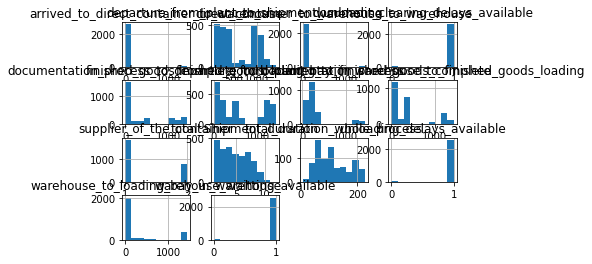

In [124]:
tx_data.hist()
pyplot.show()

In [125]:
#Add arrived time and conisider the day of week in order to consider the date and working hours
tx_data['arrived_day_of_week'] = tx_data['arrived_date_time'].dt.dayofweek

In [126]:
#Arraived hour of the day based on arrived time
tx_data['arrived_hour_of_day'] = tx_data['arrived_date_time'].dt.hour

In [127]:
tx_data['whole_process_time']=(pd.to_datetime(tx_data['shipment_unloading_date_and_time'])-pd.to_datetime(tx_data['arrived_date_time'])).dt.seconds/60

In [128]:
tx_data

responsible_dept  supplier_of_the_container  \
0                   2                          1   
1                   2                          2   
2                   1                          1   
3                   2                          1   
4                   1                          1   
...               ...                        ...   
2597                1                          1   
2598                1                          1   
2599                1                          1   
2600                1                          2   
2601                2                          1   

     status_direct_container_to_warehouse status_loading_bay  \
0                                       1                  1   
1                                       1                  1   
2                                       1                  1   
3                                       1                  1   
4                                       1                  1   
...                                   ...                ...   
2597                                    1                  1   
2598                                    0                  1   
2599                                    1                  0   
2600                                    1                  1   
2601                                    1                  1   

     reason_for_warehouse_waitting status_finished_goods_loading  \
0             Carton Missing at WH                             0   
1                    Early Arrival                             0   
2             Carton Missing at WH                             1   
3                    Early Arrival                             0   
4             Carton Missing at WH                             0   
...                            ...                           ...   
2597                   Not Defined                             1   
2598                   Not Defined                             1   
2599                 Early Arrival                             1   
2600                   Not Defined                             1   
2601                   Not Defined                             1   

     reasons_for_finsihed_goods_loading_delay status_documentation_process  \
0                               Early Arrival                            0   
1                       Finish Goods in IR WH                            0   
2                               Damage Carton                            1   
3                               Early Arrival                            0   
4                       Finish Goods in IR WH                            0   
...                                       ...                          ...   
2597                         No Delay Occured                            0   
2598                         No Delay Occured                            0   
2599                      Irradiation Pending                            0   
2600                            Early Arrival                            1   
2601                    Finish Goods in IR WH                            0   

     reason_for_document_clearing_delays reason_for_unloading_delays  ...  \
0                           vessel  omit     Vessel delays / omitted  ...   
1                         port opn delay   Vessel FCL opening delays  ...   
2             Load qty and cusdec Issues                Vessel issue  ...   
3                           cargo delays                Vessel issue  ...   
4                        port opn. delay   Vessel FCL opening delays  ...   
...                                  ...                         ...  ...   
2597                    No Delay Occured            No Delay Occured  ...   
2598                    No Delay Occured            No Delay Occured  ...   
2599                    No Delay Occured            No Delay Occured  ...   
2600                    No Delay Occured            No Delay Occured  ...   
2601      

In [129]:
tx_data.dtypes

responsible_dept                                              object
supplier_of_the_container                                      int64
status_direct_container_to_warehouse                          object
status_loading_bay                                            object
reason_for_warehouse_waitting                                 object
status_finished_goods_loading                                 object
reasons_for_finsihed_goods_loading_delay                      object
status_documentation_process                                  object
reason_for_document_clearing_delays                           object
reason_for_unloading_delays                                   object
total_Shipment_duration                                      float64
total_duration_whole_process                                 float64
container_arrived_to_warehouse_date_time              datetime64[ns]
loading_bay_in_day_and_time_warehouse                 datetime64[ns]
arrived_date_time                 

In [130]:
tx_data['responsible_dept']=tx_data['responsible_dept'].astype(int)

tx_data['supplier_of_the_container']=tx_data['supplier_of_the_container'].astype(int)
tx_data['status_direct_container_to_warehouse']=tx_data['status_direct_container_to_warehouse'].astype(int)
tx_data['status_loading_bay']=tx_data['status_loading_bay'].astype(int)
tx_data['status_finished_goods_loading']=tx_data['status_finished_goods_loading'].astype(int)
tx_data['status_documentation_process']=tx_data['status_documentation_process'].astype(int)

In [131]:
tx_data.dtypes

responsible_dept                                               int32
supplier_of_the_container                                      int32
status_direct_container_to_warehouse                           int32
status_loading_bay                                             int32
reason_for_warehouse_waitting                                 object
status_finished_goods_loading                                  int32
reasons_for_finsihed_goods_loading_delay                      object
status_documentation_process                                   int32
reason_for_document_clearing_delays                           object
reason_for_unloading_delays                                   object
total_Shipment_duration                                      float64
total_duration_whole_process                                 float64
container_arrived_to_warehouse_date_time              datetime64[ns]
loading_bay_in_day_and_time_warehouse                 datetime64[ns]
arrived_date_time                 

In [132]:
#Sort by date to feed the model
tx_data.sort_values('arrived_date_time')

responsible_dept  supplier_of_the_container  \
300                  2                          1   
306                  2                          2   
301                  1                          1   
309                  1                          1   
314                  1                          1   
...                ...                        ...   
2588                 2                          2   
2587                 2                          1   
2591                 1                          1   
2589                 1                          1   
2593                 2                          2   

      status_direct_container_to_warehouse  status_loading_bay  \
300                                      1                   1   
306                                      1                   0   
301                                      1                   1   
309                                      1                   1   
314                                      1                   1   
...                                    ...                 ...   
2588                                     1                   0   
2587                                     1                   1   
2591                                     1                   1   
2589                                     1                   1   
2593                                     1                   0   

     reason_for_warehouse_waitting  status_finished_goods_loading  \
300                  Early Arrival                              0   
306                  Early Arrival                              0   
301           Carton Missing at WH                              0   
309           Carton Missing at WH                              1   
314          Finish Goods in IR WH                              1   
...                            ...                            ...   
2588                 Early Arrival                              0   
2587                   Not Defined                              0   
2591                   Not Defined                              1   
2589                 Early Arrival                              0   
2593                 Early Arrival                              1   

     reasons_for_finsihed_goods_loading_delay  status_documentation_process  \
300                             Early Arrival                             1   
306                       Irradiation Pending                             0   
301                             Early Arrival                             0   
309                               Lunch Break                             0   
314                     Finish Goods in IR WH                             0   
...                                       ...                           ...   
2588                    Finish Goods in IR WH                             0   
2587                    Finish Goods in IR WH                             0   
2591                         No Delay Occured                             0   
2589            Shipment Loading Plan Pending                             0   
2593                Befor container F/G short                             0   

     reason_for_document_clearing_delays reason_for_unloading_delays  ...  \
300                       port opn delay   Vessel FCL opening delays  ...   
306                    cargo ready delay     Vessel delays / omitted  ...   
301                       port opn delay   Vessel FCL opening delays  ...   
309                      port opn. Delay   Vessel FCL opening delays  ...   
314                        port on delay   Vessel FCL opening delays  ...   
...                                  ...                         ...  ...   
2588                    No Delay Occured            No Delay Occured  ...   
2587                    No Delay Occured            No Delay Occured  ...   
2591                            week end            No Delay Occured  ...   
2589          Load qty and c

<AxesSubplot:>

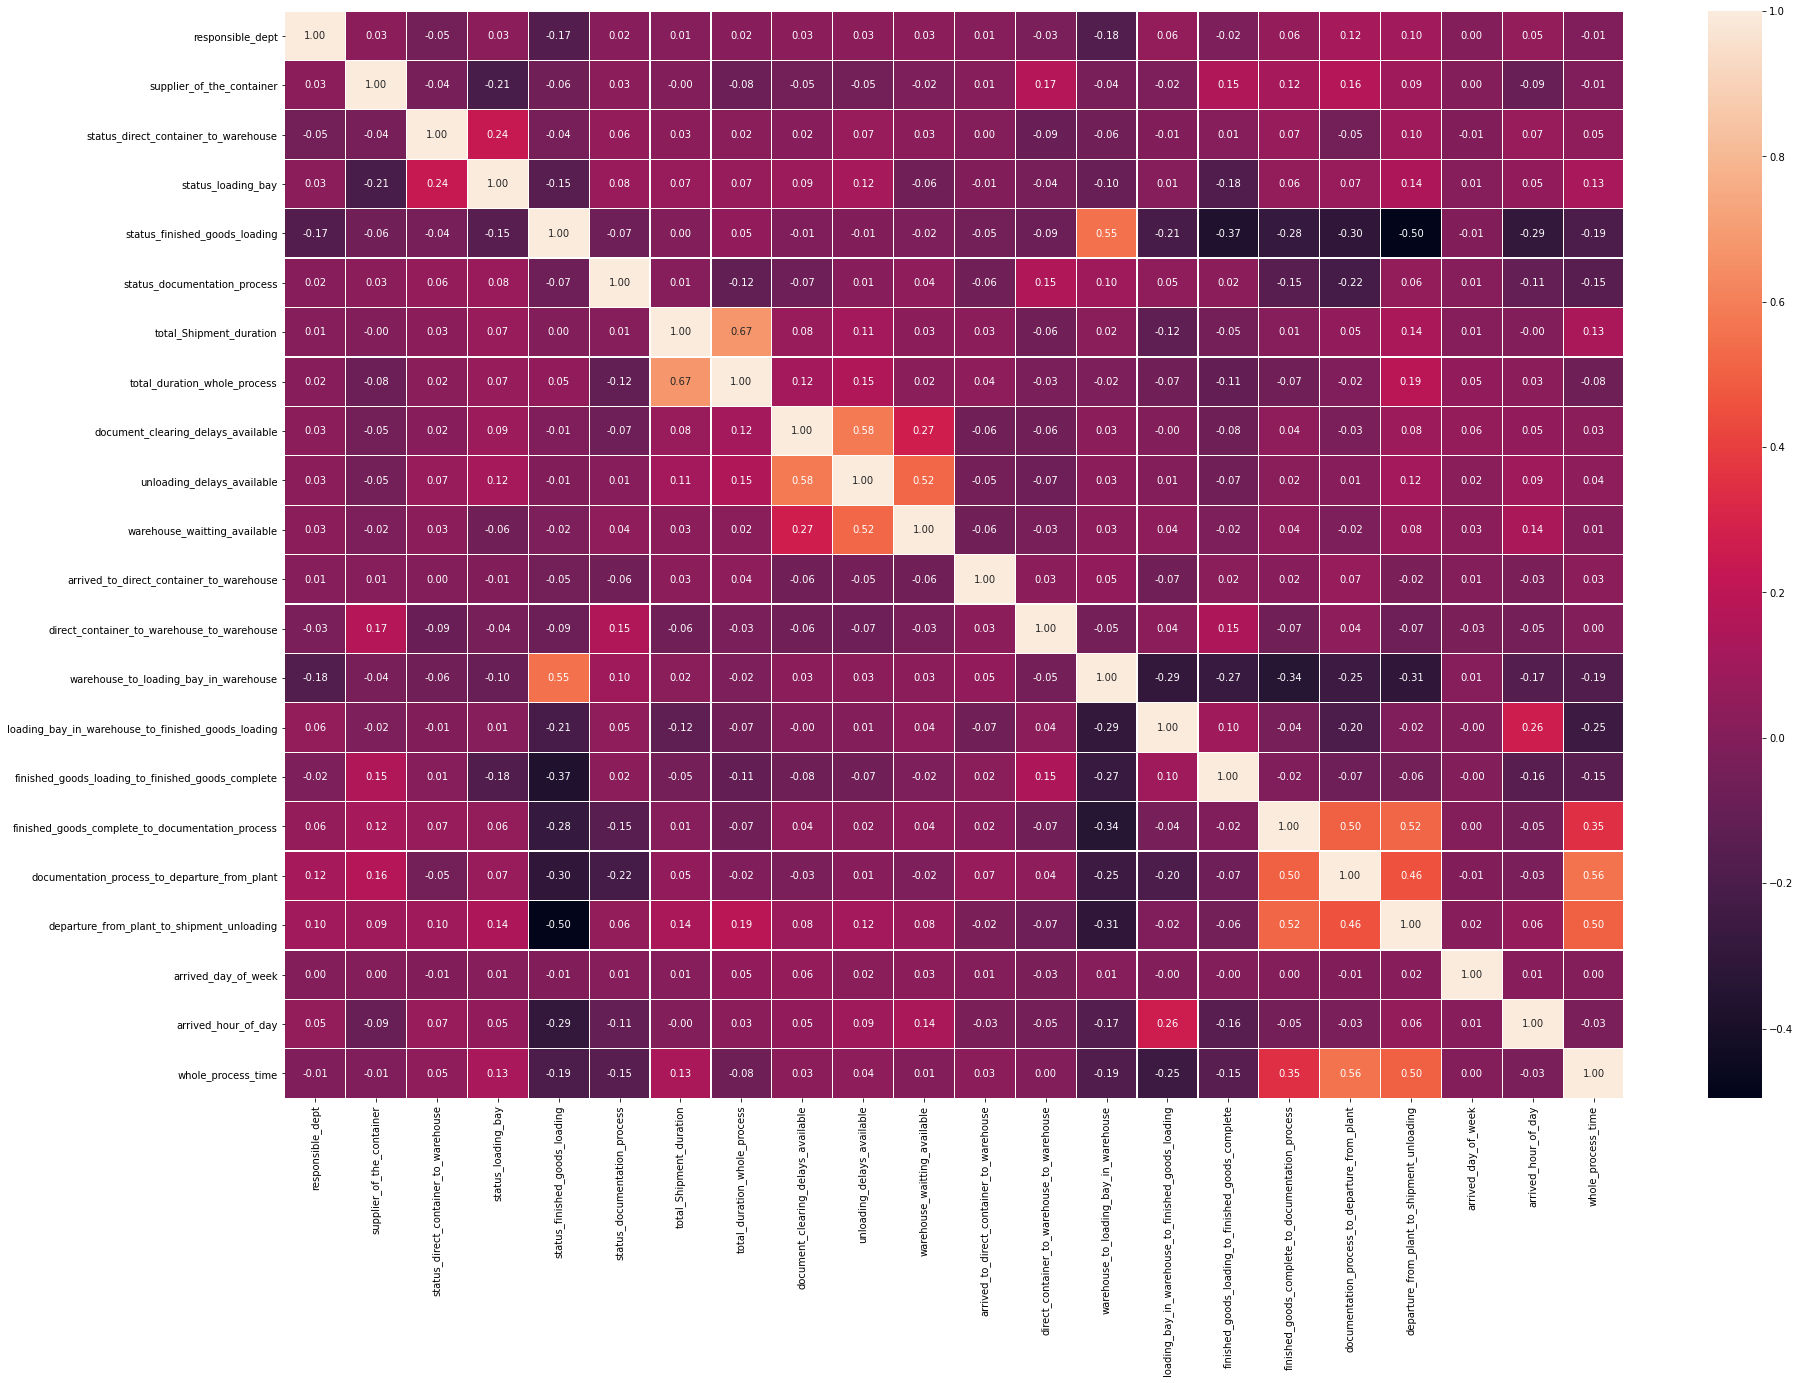

In [133]:
#Check heat map
corr = tx_data[tx_data.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

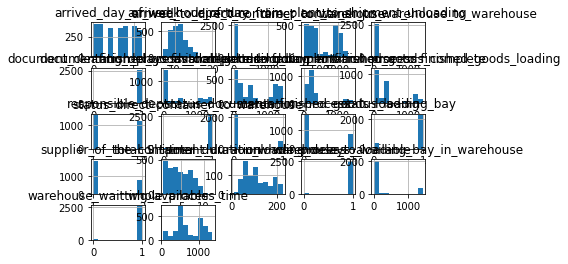

In [134]:
tx_data.hist()
pyplot.show()

In [135]:
tx_data.head(100)

responsible_dept  supplier_of_the_container  \
0                  2                          1   
1                  2                          2   
2                  1                          1   
3                  2                          1   
4                  1                          1   
..               ...                        ...   
95                 1                          1   
96                 1                          2   
97                 1                          1   
98                 2                          1   
99                 2                          2   

    status_direct_container_to_warehouse  status_loading_bay  \
0                                      1                   1   
1                                      1                   1   
2                                      1                   1   
3                                      1                   1   
4                                      1                   1   
..                                   ...                 ...   
95                                     1                   1   
96                                     1                   1   
97                                     1                   1   
98                                     1                   1   
99                                     1                   1   

   reason_for_warehouse_waitting  status_finished_goods_loading  \
0           Carton Missing at WH                              0   
1                  Early Arrival                              0   
2           Carton Missing at WH                              1   
3                  Early Arrival                              0   
4           Carton Missing at WH                              0   
..                           ...                            ...   
95         Finish Goods in IR WH                              0   
96          Carton Missing at WH                              0   
97         Finish Goods in IR WH                              1   
98          Carton Missing at WH                              0   
99                 Early Arrival                              0   

   reasons_for_finsihed_goods_loading_delay  status_documentation_process  \
0                             Early Arrival                             0   
1                     Finish Goods in IR WH                             0   
2                             Damage Carton                             1   
3                             Early Arrival                             0   
4                     Finish Goods in IR WH                             0   
..                                      ...                           ...   
95                            Early Arrival                             0   
96                            Early Arrival                             0   
97                    Finish Goods in IR WH                             1   
98                      Irradiation Pending                             0   
99                            Early Arrival                             0   

   reason_for_document_clearing_delays reason_for_unloading_delays  ...  \
0                         vessel  omit     Vessel delays / omitted  ...   
1                       port opn delay   Vessel FCL opening delays  ...   
2           Load qty and cusdec Issues                Vessel issue  ...   
3                         cargo delays                Vessel issue  ...   
4                      port opn. delay   Vessel FCL opening delays  ...   
..                                 ...                         ...  ...   
95                       EARLY BOOKING                Vessel issue  ...   
96                      port opn delay   Vessel FCL opening delays  ...   
97                        cargo delays     Vessel delays / omitted  ...   
98                     port opn. Delay     Vessel delays / omitted  ...   
99                        cargo delays   Vessel FCL opening delays 

In [136]:
#Drop reasons and other string values from the dataset
tx_data=tx_data.drop(['reason_for_warehouse_waitting','reasons_for_finsihed_goods_loading_delay','reason_for_document_clearing_delays','reason_for_unloading_delays'], axis=1)


In [137]:
tx_data

responsible_dept  supplier_of_the_container  \
0                    2                          1   
1                    2                          2   
2                    1                          1   
3                    2                          1   
4                    1                          1   
...                ...                        ...   
2597                 1                          1   
2598                 1                          1   
2599                 1                          1   
2600                 1                          2   
2601                 2                          1   

      status_direct_container_to_warehouse  status_loading_bay  \
0                                        1                   1   
1                                        1                   1   
2                                        1                   1   
3                                        1                   1   
4                                        1                   1   
...                                    ...                 ...   
2597                                     1                   1   
2598                                     0                   1   
2599                                     1                   0   
2600                                     1                   1   
2601                                     1                   1   

      status_finished_goods_loading  status_documentation_process  \
0                                 0                             0   
1                                 0                             0   
2                                 1                             1   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
2597                              1                             0   
2598                              1                             0   
2599                              1                             0   
2600                              1                             1   
2601                              1                             0   

      total_Shipment_duration  total_duration_whole_process  \
0                         4.0                        184.90   
1                         8.0                        175.35   
2                         9.0                        176.40   
3                         9.0                         31.85   
4                         9.0                         55.16   
...                       ...                           ...   
2597                      5.0                         98.65   
2598                      2.0                         32.15   
2599                      4.0                         79.24   
2600                      1.0                          8.25   
2601                      2.0                         31.65   

     container_arrived_to_warehouse_date_time  \
0                         2020-02-15 08:19:00   
1                         2020-02-15 10:00:00   
2                         2020-02-15 11:00:00   
3                         2020-02-15 13:30:00   
4                         2020-02-15 12:30:00   
...                                       ...   
2597                      2020-09-14 16:10:00   
2598                      2020-10-15 09:10:00   
2599                      2020-09-15 09:25:00   
2600                      2020-09-15 08:40:00   
2601                      2020-09-16 09:00:00   

     loading_bay_in_day_and_time_warehouse  ...  \
0                      2020-02-15 10:00:00  ...   
1                      2020-02-15 10:25:00  ...   
2                      2020-02-15 10:50:00  ...   
3                      2020-02-15 13:30:00  ...   
4                      2020-02-15 12:30:00  ...   
...                                    ...  ...   
2597                   2020-09-14 16:14:00  

In [138]:
#Drop date values because they cannot be used 
tx_data=tx_data.drop([ 'arrived_date_time','direct_container_to_warehouse_date_time','container_arrived_to_warehouse_date_time','loading_bay_in_day_and_time_warehouse','finished_goods_loading_date_time','documentation_process_date_time','departure_from_plant_date_time','shipment_unloading_date_and_time','finished_goods_complete_date_time','total_duration_whole_process'], axis=1)

In [139]:
tx_data

responsible_dept  supplier_of_the_container  \
0                    2                          1   
1                    2                          2   
2                    1                          1   
3                    2                          1   
4                    1                          1   
...                ...                        ...   
2597                 1                          1   
2598                 1                          1   
2599                 1                          1   
2600                 1                          2   
2601                 2                          1   

      status_direct_container_to_warehouse  status_loading_bay  \
0                                        1                   1   
1                                        1                   1   
2                                        1                   1   
3                                        1                   1   
4                                        1                   1   
...                                    ...                 ...   
2597                                     1                   1   
2598                                     0                   1   
2599                                     1                   0   
2600                                     1                   1   
2601                                     1                   1   

      status_finished_goods_loading  status_documentation_process  \
0                                 0                             0   
1                                 0                             0   
2                                 1                             1   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
2597                              1                             0   
2598                              1                             0   
2599                              1                             0   
2600                              1                             1   
2601                              1                             0   

      total_Shipment_duration  document_clearing_delays_available  \
0                         4.0                                   1   
1                         8.0                                   1   
2                         9.0                                   1   
3                         9.0                                   1   
4                         9.0                                   1   
...                       ...                                 ...   
2597                      5.0                                   0   
2598                      2.0                                   0   
2599                      4.0                                   0   
2600                      1.0                                   0   
2601                      2.0                                   0   

      unloading_delays_available  warehouse_waitting_available  ...  \
0                              1                             1  ...   
1                              1                             1  ...   
2                              1                             1  ...   
3                              1                             1  ...   
4                              1                             1  ...   
...                          ...                           ...  ...   
2597                           0                             0  ...   
2598                           0                             0  ...   
2599                           0                             1  ...   
2600                           0                             0  ...   
2601                           0                             0  ...   

      direct_container_to_warehouse_to_warehouse  \
0            

In [140]:
#Drop other calulated date times because of no use and not practical scenario
tx_data=tx_data.drop(['total_Shipment_duration','arrived_to_direct_container_to_warehouse','direct_container_to_warehouse_to_warehouse','warehouse_to_loading_bay_in_warehouse','loading_bay_in_warehouse_to_finished_goods_loading','finished_goods_loading_to_finished_goods_complete','finished_goods_complete_to_documentation_process','documentation_process_to_departure_from_plant','departure_from_plant_to_shipment_unloading','status_finished_goods_loading','status_documentation_process'], axis=1)

In [141]:
tx_data

responsible_dept  supplier_of_the_container  \
0                    2                          1   
1                    2                          2   
2                    1                          1   
3                    2                          1   
4                    1                          1   
...                ...                        ...   
2597                 1                          1   
2598                 1                          1   
2599                 1                          1   
2600                 1                          2   
2601                 2                          1   

      status_direct_container_to_warehouse  status_loading_bay  \
0                                        1                   1   
1                                        1                   1   
2                                        1                   1   
3                                        1                   1   
4                                        1                   1   
...                                    ...                 ...   
2597                                     1                   1   
2598                                     0                   1   
2599                                     1                   0   
2600                                     1                   1   
2601                                     1                   1   

      document_clearing_delays_available  unloading_delays_available  \
0                                      1                           1   
1                                      1                           1   
2                                      1                           1   
3                                      1                           1   
4                                      1                           1   
...                                  ...                         ...   
2597                                   0                           0   
2598                                   0                           0   
2599                                   0                           0   
2600                                   0                           0   
2601                                   0                           0   

      warehouse_waitting_available  arrived_day_of_week  arrived_hour_of_day  \
0                                1                    5                    8   
1                                1                    5                    9   
2                                1                    5                   10   
3                                1                    5                   13   
4                                1                    5                   12   
...                            ...                  ...                  ...   
2597                             0                    0                   15   
2598                             0                    1                    9   
2599                             1                    1                    9   
2600                             0                    1                    8   
2601                             0                    2                    8   

      whole_process_time  
0                  757.0  
1                   86.0  
2                  570.0  
3                 1000.0  
4                 1115.0  
...                  ...  
2597               511.0  
2598               621.0  
2599               260.0  
2600               640.0  
2601               814.0  

[2602 rows x 10 columns]

In [142]:
tx_data['whole_process_segment']=round(tx_data['whole_process_time']/24)

In [143]:
tx_data

responsible_dept  supplier_of_the_container  \
0                    2                          1   
1                    2                          2   
2                    1                          1   
3                    2                          1   
4                    1                          1   
...                ...                        ...   
2597                 1                          1   
2598                 1                          1   
2599                 1                          1   
2600                 1                          2   
2601                 2                          1   

      status_direct_container_to_warehouse  status_loading_bay  \
0                                        1                   1   
1                                        1                   1   
2                                        1                   1   
3                                        1                   1   
4                                        1                   1   
...                                    ...                 ...   
2597                                     1                   1   
2598                                     0                   1   
2599                                     1                   0   
2600                                     1                   1   
2601                                     1                   1   

      document_clearing_delays_available  unloading_delays_available  \
0                                      1                           1   
1                                      1                           1   
2                                      1                           1   
3                                      1                           1   
4                                      1                           1   
...                                  ...                         ...   
2597                                   0                           0   
2598                                   0                           0   
2599                                   0                           0   
2600                                   0                           0   
2601                                   0                           0   

      warehouse_waitting_available  arrived_day_of_week  arrived_hour_of_day  \
0                                1                    5                    8   
1                                1                    5                    9   
2                                1                    5                   10   
3                                1                    5                   13   
4                                1                    5                   12   
...                            ...                  ...                  ...   
2597                             0                    0                   15   
2598                             0                    1                    9   
2599                             1                    1                    9   
2600                             0                    1                    8   
2601                             0                    2                    8   

      whole_process_time  whole_process_segment  
0                  757.0                   32.0  
1                   86.0                    4.0  
2                  570.0                   24.0  
3                 1000.0                   42.0  
4                 1115.0                   46.0  
...                  ...                    ...  
2597               511.0                   21.0  
2598               621.0                   26.0  
2599               260.0                   11.0  
2600               640.0                   27.0  
2601               814.0                   34.0  

[2602 rows x 11 columns]

In [144]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
X, y = tx_data.drop(['whole_process_time','whole_process_segment'],axis=1), tx_data.whole_process_segment
# y = to_categorical(y)

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)

# # convert integers to dummy variables (i.e. one hot encoded)
# y = to_categorical(y)

# sc = MinMaxScaler(feature_range=(0, 1))
# X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

Using TensorFlow backend.


In [145]:
X_train.dtypes

responsible_dept                        int32
supplier_of_the_container               int32
status_direct_container_to_warehouse    int32
status_loading_bay                      int32
document_clearing_delays_available      int32
unloading_delays_available              int32
warehouse_waitting_available            int32
arrived_day_of_week                     int64
arrived_hour_of_day                     int64
dtype: object

In [146]:
#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=34)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)
    

LR [0.35779817 0.36854191]
NB [0.09059633 0.05970149]
RF [0.375      0.36509759]
SVC [0.3233945  0.30424799]
Dtree [0.36123853 0.35476464]
XGB [0.43807339 0.41905855]
KNN [0.34977064 0.30080367]


In [147]:
# model = xgb.XGBClassifier()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

In [148]:
xgb_model = xgb.XGBClassifier(max_depth=5,min_child_weight=1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.54
Accuracy of XGB classifier on test set: 0.42


In [149]:
import joblib
joblib.dump(xgb_model,'model_activities.sav')

['model_activities.sav']

In [150]:
classifier = joblib.load('model_activities.sav')

In [ ]:
# xgb_model = xgb.XGBClassifier(max_depth=5,min_child_weight=1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(classifier.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(classifier.score(X_test[X_train.columns], y_test)))

In [ ]:
import pickle
with open('model.pkl', 'wb') as model_file:
  pickle.dump(xgb_model, model_file)

In [ ]:
# model saved 
filename = 'finalized_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))
 
# some time later...


In [ ]:
# booster=xgb.Booster()
xgb_model.save_model('model_xgb.json')


In [ ]:
 
# load the model from disk to test
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(xgb_model,'model_xgb_new.joblib')

In [ ]:
import joblib
joblib.dump(xgb_model,'new_model.sav')

In [ ]:
# check result
result = loaded_model.score(X_train, y_train)

In [ ]:
# print results
print(result)

In [ ]:
model_sss=loaded_model.predict(X_train)

In [ ]:
# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

In [ ]:
print(model_sss)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
X, y = tx_data.drop(['whole_process_time','whole_process_segment'],axis=1), tx_data['whole_process_segment']
# y = to_categorical(y)



In [ ]:

# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)
# y = to_categorical(y)


sc = MinMaxScaler(feature_range=(0, 0.99999))

X = sc.fit_transform(X)
y = y.values.reshape(-1, 1)
y = sc.fit_transform(y)


In [ ]:
# X
# X.loc[X >= 1]

In [ ]:
y

In [ ]:
# # split into train test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
# # X_train = X_train.reshape(-1, 6 )
# # X_test  = X_test.reshape(-1, 6 )
# # y_train = y_train.reshape(-1, 6 )
# # y_test = y_test.reshape(-1, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from tensorflow.keras import layers

model = Sequential()
model.add(Dense(500, input_shape = (9,), activation='relu',kernel_initializer='random_normal'))

# model.add(LSTM(64,input_shape = (6,1) ))

# model.add(LSTM(64))
# ,input_shape=(1, 9), return_sequences=True
# model.add(LSTM(64,input_shape=(1, 9), return_sequences=True))

# model.add(Dense(700, activation='relu',kernel_initializer='random_normal'))

# model.add(Dropout(0.3))

model.add(Dense(100, activation='relu',kernel_initializer='random_normal'))

# model.add(Dropout(0.2))

#Output layer
# model.add(Dense(200, activation='sigmoid'))

# model.add(Dropout(0.2))

# model.add(Dense(500, input_shape = (len(X_train),6 ), activation='relu',kernel_initializer='random_normal'))

# # Recurrent layer
# model.add(LSTM(300, return_sequences=True, dropout=0.1, recurrent_dropout=0.1,input_shape = (len(X_train),6)))

# # Fully connected layer
# model.add(Dense(64, activation='relu'))

# # Dropout for regularization
# model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Train the model
model.fit(X_train,y_train,batch_size = 32,
          epochs=100)

In [ ]:
pred= model.predict(X_test)

In [ ]:
# # for i in range(100):

#     print('\n\n',X_test[i],'\nprediction==>', pred[i], 'original==>',y_test[i])

In [ ]:
# count=0
# for i in range(len(pred)-1):
#     if pred[i]==y_test[i]:
#         count=count+1

In [ ]:
# print(len(X_test))
# print(len(y_test))


In [ ]:
# import math
# from sklearn.metrics import mean_squared_error
# testPredict = model.predict(X_test)
# # invert predictions


# testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))